https://github.com/arunm8489/Amazon_Fine_Food_Reviews-sentiment_analysis/blob/master/Notebooks/4.%20Logistic_regression.ipynb

https://towardsdatascience.com/sentiment-analysis-on-amazon-food-reviews-from-eda-to-deployment-f985c417b0c

https://www.kaggle.com/code/poonaml/text-classification-using-spacy

https://www.kaggle.com/code/elshatakmaev/review-classification-using-pytorch

#### Dependencies

### Import Modules

In [22]:
!pip install --upgrade tqdm

In [24]:
!pip show tqdm

Name: tqdm
Version: 4.66.2
Summary: Fast, Extensible Progress Meter
Home-page: 
Author: 
Author-email: 
License: MPL-2.0 AND MIT
Location: c:\users\ana.poveda.garcia\anaconda3\envs\project\lib\site-packages
Requires: colorama
Required-by: azure-ai-ml, nltk


In [10]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import re#from tqdm.notebook import tqdmd
from keras.preprocessing.text import text_to_word_sequence
import nltk#
from nltk.corpus import stopword#
from nltk.corpus import wordnet#
from nltk import pos_ta#g
imp rt #ti
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import seaborn as sns
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
from PIL import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizermesm

SyntaxError: invalid syntax (532795126.py, line 14)

In [3]:
!pip install nltk

In [5]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>


False

In [19]:
!pip install ti

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ti: filename=ti-0.1.2-py3-none-any.whl size=8566 sha256=40ebeff9048e6cdb094e1f53c530035181326eb21fb5d66ad7f7082a5f2570dd
  Stored in directory: c:\users\ana.poveda.garcia\appdata\local\pip\cache\wheels\b2\46\b3\0c2f4f97d369f01bffd43e39b829f000ea520d3e6cd88f02bb
Successfully built ti


In [25]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import re
#from tqdm.notebook import tqdm
from keras.preprocessing.text import text_to_word_sequence
import nltk
#from nltk.corpus import stopword
from nltk.corpus import wordnet
from nltk import pos_tag
import ti
from nltk.stem import WordNetLemmatizer
import seaborn as snsmesm
import seaborn as sns
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
from PIL import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

###  1. Data Processing

#### Show DataFrame

In [11]:
import numpy as np
import pandas as pd
import os

In [2]:
#!pip install numpy==1.21.2

In [3]:
#!pip install pandas

In [33]:
df = pd.read_csv('../data/amazon_fine_food_reviews.csv')

In [34]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df.shape

(568454, 10)

#### Data Cleaning

##### Remove Nan

In [8]:
df.Summary.isnull().sum()

27

In [9]:
df.dropna(subset=['Summary'], inplace=True)

In [10]:
df.Summary.isnull().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568427 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568427 non-null  int64 
 1   ProductId               568427 non-null  object
 2   UserId                  568427 non-null  object
 3   ProfileName             568401 non-null  object
 4   HelpfulnessNumerator    568427 non-null  int64 
 5   HelpfulnessDenominator  568427 non-null  int64 
 6   Score                   568427 non-null  int64 
 7   Time                    568427 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568427 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [12]:
df.shape

(568427, 10)

##### Deduplication

In [13]:
df.drop_duplicates(subset=['UserId','ProfileName','Time','Text'], keep='first',inplace=True)

In [14]:
df.shape

(393930, 10)

##### Remove colums without useful information

In [15]:
df.drop(['Id','UserId','ProfileName'], axis=1, inplace=True)

In [16]:
df.shape

(393930, 7)

In [17]:
df.head(5)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##### Transform time format and add new column

In [18]:
import datetime

In [19]:
datetime.datetime.fromtimestamp(df.loc[0,'Time'])

datetime.datetime(2011, 4, 27, 2, 0)

In [20]:
df['DateTime'] = df['Time'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [21]:
df.head(5)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00


In [22]:
df.shape

(393930, 8)

##### Avoid HelpfulnessNumerator bigger that HelpfulnessDenominator

In [23]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime
44736,B001EQ55RW,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,2008-06-08 02:00:00
64421,B000MIDROQ,3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,2008-10-25 02:00:00


In [24]:
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [25]:
df.shape

(393928, 8)

In [26]:
#Checking to see how much % of data still remains
#print(f'Remaining data is {((shape[0]*1.0)/(df.shape[0]*1.0))*100}')

https://www.kaggle.com/code/prasheel1047/review-positive-or-negative?scriptVersionId=78532145&cellId=16

https://www.kaggle.com/code/harits/amazon-reviews-sentiment-analysis?scriptVersionId=115541011&cellId=5

##### Remove Special characters

##### Tokenization

##### Remove Stop-words

##### Text normalization
- Convert Lower or Upper case
- Remove punctuation
  

##### Steamming or Lemmatization

### 2. Exploratory Data Analysis

In [27]:
#!pip install matplotlib

In [28]:
import matplotlib.pyplot as plt

#### Descriptive analysis of the data (basic statistics, distributions, etc.).

In [29]:
df.head()

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00


In [30]:
df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,DateTime
count,393928.000000,393928.000000,393928.000000,3.939280e+05,393928
mean,1.734401,2.204758,4.179408,1.296449e+09,2011-01-31 06:26:31.618773248
min,0.000000,0.000000,1.000000,9.393408e+08,1999-10-08 02:00:00
25%,0.000000,0.000000,4.000000,1.271376e+09,2010-04-16 02:00:00
50%,0.000000,1.000000,5.000000,1.311638e+09,2011-07-26 02:00:00
75%,2.000000,2.000000,5.000000,1.332979e+09,2012-03-29 02:00:00
max,866.000000,923.000000,5.000000,1.351210e+09,2012-10-26 02:00:00
std,6.872306,7.534738,1.311925,4.840316e+07,NaN


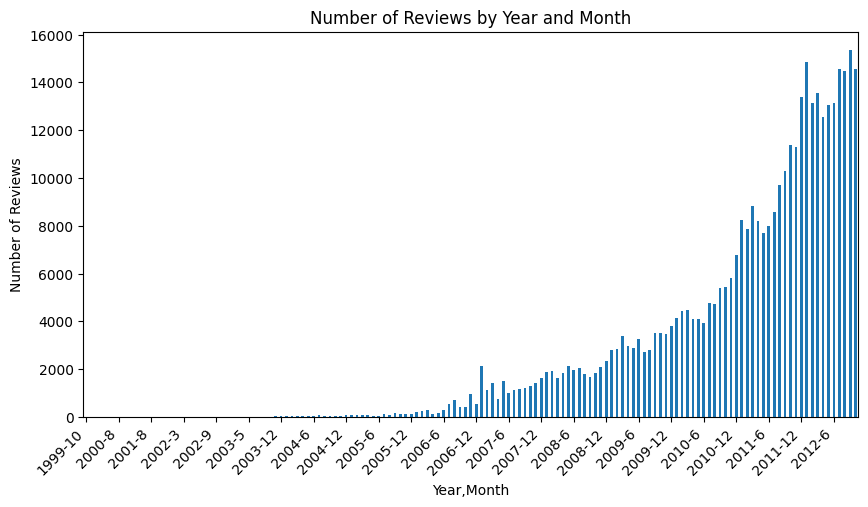

In [31]:
# Assuming 'DateTime' is the column containing timestamps
# Convert the column to datetime format if needed
df['DateTime'] = pd.to_datetime(df['DateTime'])
 
# Extract the year and month components
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Group by year and month, and count occurrences
monthly_counts = df.groupby(['Year', 'Month']).size()

# Create the time series plot
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', title='Number of Reviews by Year and Month')

xticks = monthly_counts.index.map(lambda x: f"{x[0]}-{x[1]}")
xticks = xticks[::6]  # Selecciona cada 6 meses
plt.gca().set_xticks(range(0, len(xticks) * 6, 6))
plt.gca().set_xticklabels(xticks, rotation=45, ha='right')

plt.ylabel('Number of Reviews')

# Save the plot
plt.savefig('../reports/images/reviews_for_Year_Month.png')
 
# Show the plot
plt.show()

In [32]:
df.head(1)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Year,Month
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00,2011,4


In [33]:
dff = df[['Text','Score']]
dff['date'] = pd.to_datetime(df['Time'],unit='s')

C:\Users\ana.poveda.garcia\AppData\Local\Temp\ipykernel_13272\1429197469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['date'] = pd.to_datetime(df['Time'],unit='s')


In [34]:
dff

,Text,Score,date
0,I have bought several of the Vitality canned d...,5,2011-04-27
1,Product arrived labeled as Jumbo Salted Peanut...,1,2012-09-07
2,This is a confection that has been around a fe...,4,2008-08-18
3,If you are looking for the secret ingredient i...,2,2011-06-13
4,Great taffy at a great price. There was a wid...,5,2012-10-21
...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,2011-03-09
568450,I'm disappointed with the flavor. The chocolat...,2,2012-03-09
568451,"These stars are small, so you can give 10-15 o...",5,2012-02-21
568452,These are the BEST treats for training and rew...,5,2012-03-13


More year, more internet, more reviews

##### Reviews Days

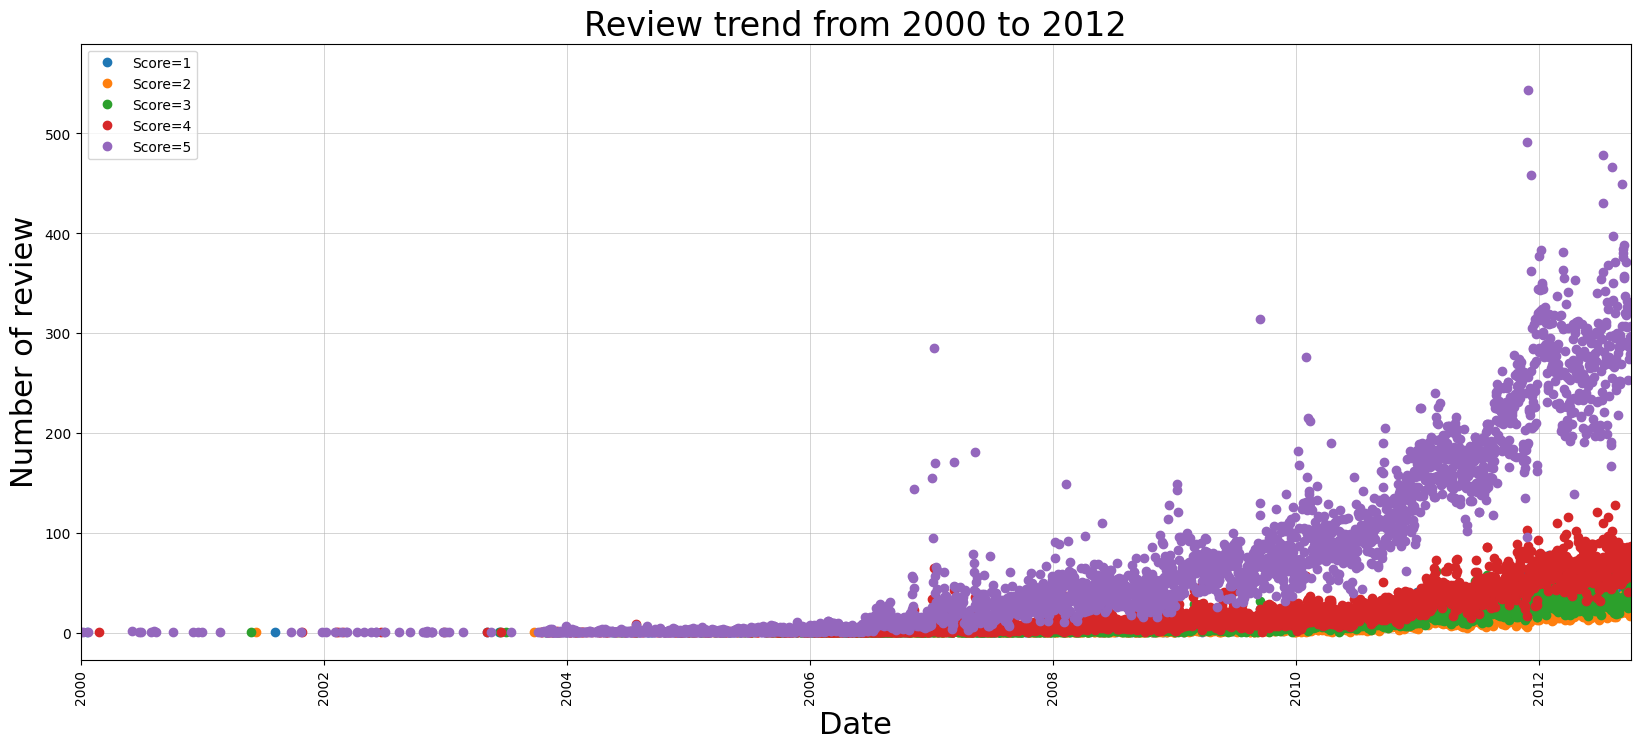

In [35]:
# Assuming 'dff' is your DataFrame

# Convert 'date' to datetime
#dff.date = df.date.dt.strftime('%Y-%m-%d')
#dff['date'] = pd.to_datetime(dff['date'] )

# Filter and count by score
scores = [1, 2, 3, 4, 5]
plt.figure(figsize=(20, 8))
for score in scores:
    dff_score = dff[dff['Score'] == score].groupby('date').size().reset_index(name='Count')
    plt.plot_date(x=dff_score['date'], y=dff_score['Count'], label=f'Score={score}')

# Customize the plot
plt.grid(linewidth=0.5, alpha=0.75)
plt.xticks(rotation=90)
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2012-10-01'))
plt.xlabel('Date', fontsize=22)
plt.ylabel('Number of review', fontsize=22)
plt.title('Review trend from 2000 to 2012', fontsize=24)

# Save the plot
plt.savefig('../reports/images/review_trend_day.png')

# Show the legend
plt.legend()

# Show the plot
plt.show()

##### Reviews Month

C:\Users\ana.poveda.garcia\AppData\Local\Temp\ipykernel_13272\1326253661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.date = dff.date.dt.strftime('%Y-%m')
C:\Users\ana.poveda.garcia\AppData\Local\Temp\ipykernel_13272\1326253661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['date'] = pd.to_datetime(dff['date'] )


,Text,Score,date
0,I have bought several of the Vitality canned d...,5,2011-04-01
1,Product arrived labeled as Jumbo Salted Peanut...,1,2012-09-01
2,This is a confection that has been around a fe...,4,2008-08-01
3,If you are looking for the secret ingredient i...,2,2011-06-01
4,Great taffy at a great price. There was a wid...,5,2012-10-01
...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,2011-03-01
568450,I'm disappointed with the flavor. The chocolat...,2,2012-03-01
568451,"These stars are small, so you can give 10-15 o...",5,2012-02-01
568452,These are the BEST treats for training and rew...,5,2012-03-01


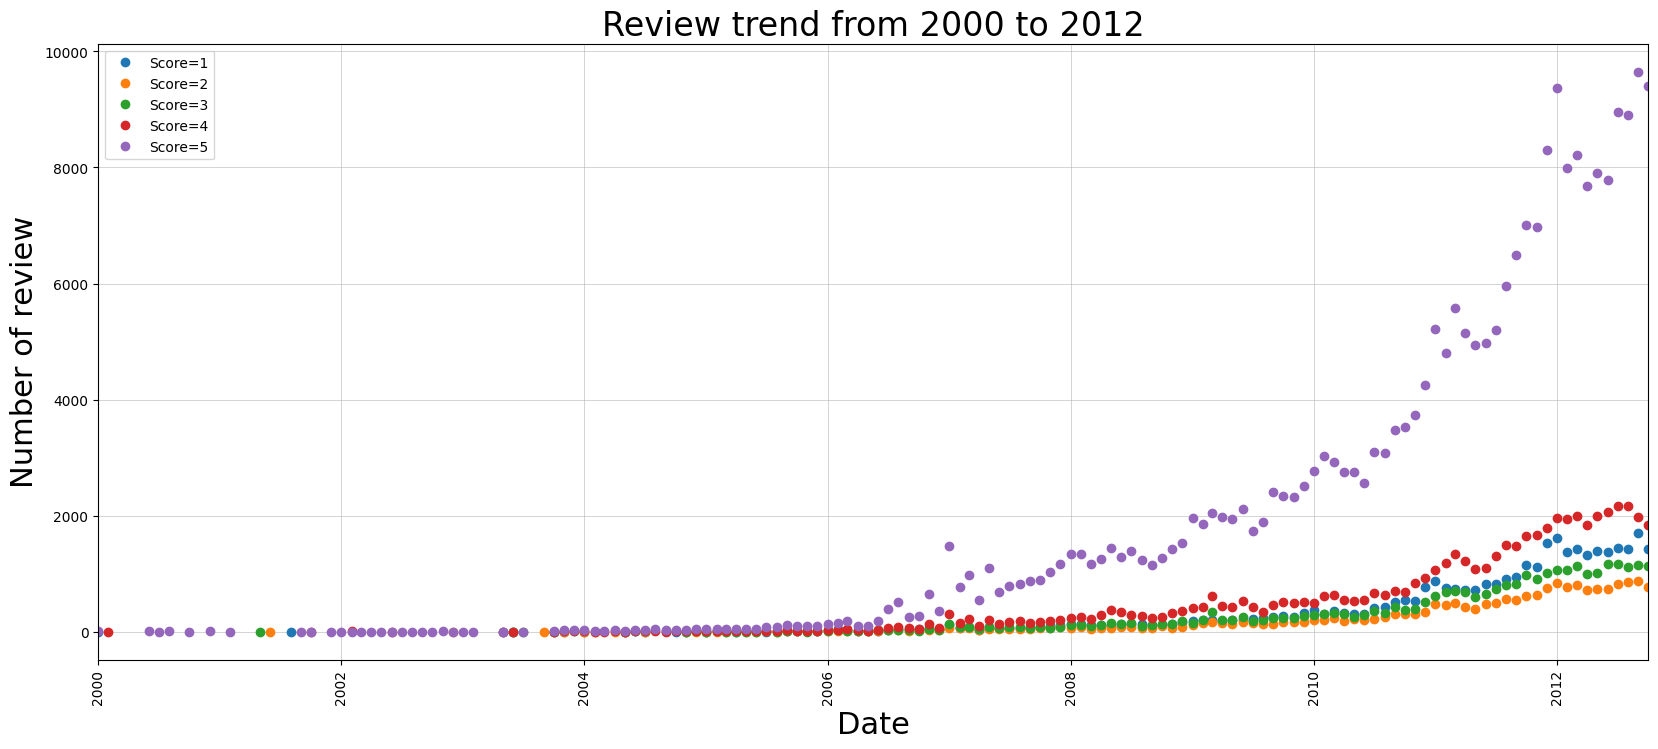

In [36]:
# Assuming 'dff' is your DataFrame

# Convert 'date' to datetime
dff.date = dff.date.dt.strftime('%Y-%m')
dff['date'] = pd.to_datetime(dff['date'] )
display(dff)

# Filter and count by score
scores = [1, 2, 3, 4, 5]
plt.figure(figsize=(20, 8))
for score in scores:
    dff_score = dff[dff['Score'] == score].groupby('date').size().reset_index(name='Count')
    plt.plot_date(x=dff_score['date'], y=dff_score['Count'], label=f'Score={score}')

# Customize the plot
plt.grid(linewidth=0.5, alpha=0.75)
plt.xticks(rotation=90)
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2012-10-01'))
plt.xlabel('Date', fontsize=22)
plt.ylabel('Number of review', fontsize=22)
plt.title('Review trend from 2000 to 2012', fontsize=24)

# Save the plot
plt.savefig('../reports/images/review_trend_month.png')

# Show the legend
plt.legend()

# Show the plot
plt.show()

#### Visualisation of the distribution of ratings (score column)

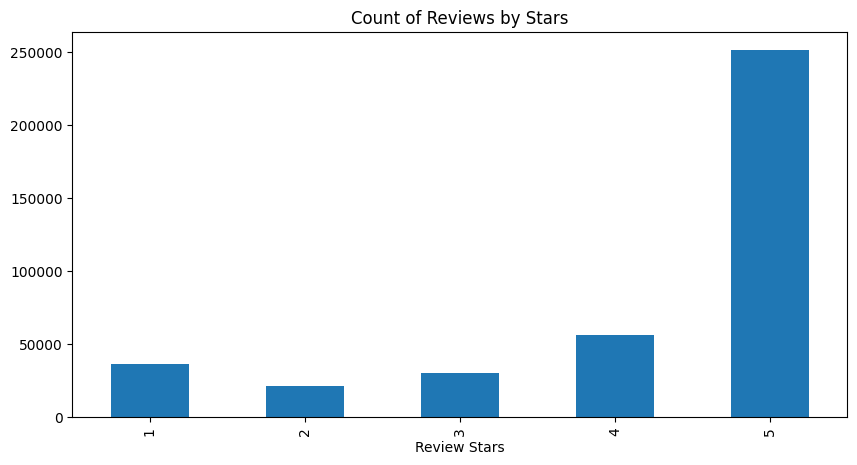

In [37]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')

# Save the plot
plt.savefig('../reports/images/review_score.png')

plt.show()

The dataset is unbalanced

##### Top 10 Reviewed Poducts

In [38]:
df

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Year,Month
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00,2011,4
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00,2012,9
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00,2008,8
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00,2011,6
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00,2012,10
...,...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09 01:00:00,2011,3
568450,B003S1WTCU,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09 01:00:00,2012,3
568451,B004I613EE,2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21 01:00:00,2012,2
568452,B004I613EE,1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13 01:00:00,2012,3


Text(0.5, 1.0, 'Top 10 Reviewed Products')

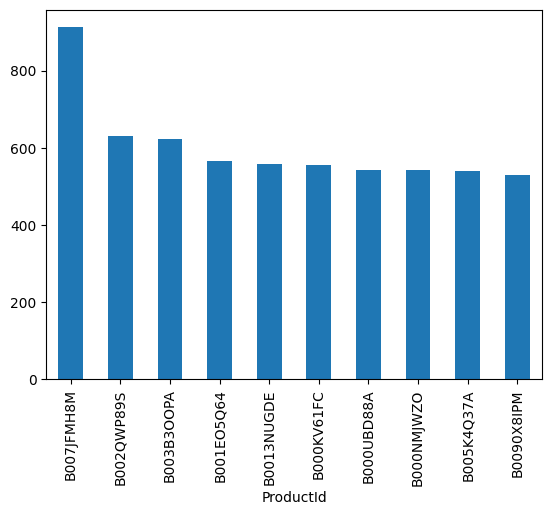

In [39]:
prod = df['ProductId'].value_counts().head(10) 
prod.plot(kind='bar') 
ax.set_title('Top 10 Reviewed Products')

# Save the plot
plt.savefig('../reports/images/review_products.png')

##### Top 5 Reviewed Products for each Year

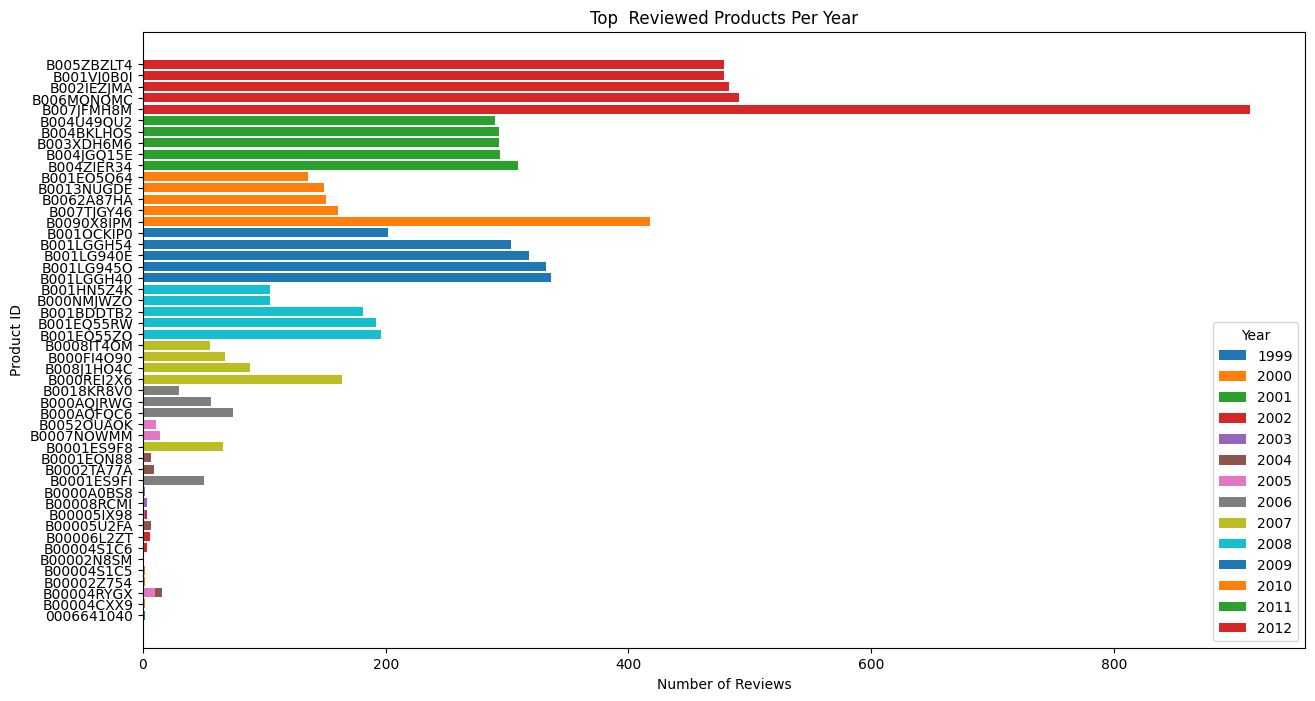

In [40]:
# Convert 'Time' column to datetime
df['Year'] = pd.to_datetime(df['Time'], unit='s').dt.year
 
# Group by year and product, and count the number of reviews
grouped_df = df.groupby(['Year', 'ProductId']).size().reset_index(name='ReviewCount')
 
# Get the top 10 reviewed products for each year
top_products_per_year = grouped_df.groupby('Year').apply(lambda x: x.nlargest(5, 'ReviewCount')).reset_index(drop=True)
 
# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
 
for year in sorted(top_products_per_year['Year'].unique()):
    year_data = top_products_per_year[top_products_per_year['Year'] == year]
    ax.barh(year_data['ProductId'], year_data['ReviewCount'], label=str(year))
 
ax.set_title('Top  Reviewed Products Per Year')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Product ID')
ax.legend(title='Year')

# Save the plot
plt.savefig('../reports/images/review_products_year.png')

plt.show()
 

### 3. Exploratory Data Text

#### Text Preprocessing 

https://www.kaggle.com/code/prasheel1047/review-positive-or-negative?scriptVersionId=78532145&cellId=16
https://www.kaggle.com/code/harits/amazon-reviews-sentiment-analysis?scriptVersionId=115541011&cellId=5

##### Remove Special characters

In [41]:
def remove_sub_text(pattern, text):
    pattern = re.compile(pattern) 
    clean_text = re.sub(pattern, ' ', text)
    return clean_text

In [42]:
type(df["Text"])

pandas.core.series.Series

In [43]:
#!pip install tqdm

In [44]:
import re
from tqdm.notebook import tqdm

In [45]:
tqdm.pandas()

In [46]:
# Remove URL
url_pattern = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
df["CleanText"] = df["Text"].progress_apply(lambda x: re.sub(url_pattern, ' ', x))
print("Remove URL: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove URL: Okay


In [47]:
# Remove HTML
pattern = '<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});'
df["CleanText"] = df["CleanText"].progress_apply(lambda x: remove_sub_text(pattern, x))
print("Remove HTML: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove HTML: Okay


In [48]:
# Remove Number
df["CleanText"] = df["CleanText"].progress_apply(lambda x: ''.join(s for s in x if not s.isdigit()))
print("Remove Number: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove Number: Okay


In [49]:
# Remove Extra Spaces
df["CleanText"] = df["CleanText"].progress_apply(lambda x: ' '.join(x.split()))
print("Remove Extra Spaces: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove Extra Spaces: Okay


##### Tokenization

In [50]:
#!pip install keras

In [51]:
#!pip install tensorflow

In [52]:
from keras.preprocessing.text import text_to_word_sequence

In [53]:
# Tokenization
df["TokenText"] = df["CleanText"].progress_apply(lambda x: text_to_word_sequence(x))
print("Tokenization: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Tokenization: Okay


##### Remove Stop-words

In [54]:
#!pip install nltk

In [55]:
import nltk
from nltk.corpus import stopwords

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ana.poveda.garcia\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
#!pip install textblob

In [58]:
#!python -m textblob.download_corpora lite

In [59]:
# Remove Stopwords
stop = set(stopwords.words('english'))
df["TokenText"] = df["TokenText"].progress_apply(lambda x: [word for word in x if word not in stop])
print("Remove Stopwords: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove Stopwords: Okay


##### Text normalization
- Convert Lower or Upper case
- Remove punctuation

In [60]:
# Lower Casing
df["CleanText"] = df["CleanText"].progress_apply(lambda x: x.lower())
print("Lower Casing: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Lower Casing: Okay


##### Tagging (optional)

In [76]:
from nltk.corpus import wordnet
from nltk import pos_tag
import time

In [79]:
def pos_tagging(tokens):
    # Mapping dictionary for part-of-speech tags
    pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
    # Perform POS tagging and mapping of tags to WordNet POS tags
    tagged_tokens = []
    for token in tokens:
        tags = pos_tag(token)
        newlist = [(word, pos_dict.get(tag[0])) for word, tag in tags]
        tagged_tokens.append(newlist)
    return tagged_tokens


In [80]:
# Use the pos_tagging function
start_time = time.time()
pos_tagging_result = pos_tagging(df['TokenText'])

# Assign result to a column in the DataFrame df
df["POSTagged"] = pos_tagging_result

In [81]:
print("--- %s seconds ---" % (time.time() - start_time))
print("POS Tagging: Okay")

--- 1372.7638425827026 seconds ---
POS Tagging: Okay


##### Lemmatization

In [82]:
from nltk.stem import WordNetLemmatizer

In [83]:
def lemmatize(pos_data):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [84]:
# Lemmatization
df['FinalText'] = df['POSTagged'].progress_apply(lemmatize)
print("Lemmatization")

  0%|          | 0/393928 [00:00<?, ?it/s]

Lemmatization


In [85]:
# Remove Extra Spaces Again
df["FinalText"] = df["FinalText"].progress_apply(lambda x: ' '.join(x.split()))
print("Remove Extra Spaces Again: Okay")

# Remove NaN Final Text
df = df.dropna(subset=["FinalText"])
print("Remove NaN Final Text: Okay")

# Remove Final Text with Only 1 Word
df["WordCount"] = df["FinalText"].progress_apply(lambda x: len(x.split()))
df = df[df["WordCount"]>1]
print("Remove Final Text with Only 1 Word: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove Extra Spaces Again: Okay
Remove NaN Final Text: Okay


  0%|          | 0/393928 [00:00<?, ?it/s]

Remove Final Text with Only 1 Word: Okay


In [86]:
df.head(5)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Year,Month,CleanText,TokenText,POSTagged,FinalText,WordCount
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00,2011,4,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...","[(bought, v), (several, a), (vitality, n), (ca...",buy several vitality can dog food product find...,23
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00,2012,9,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...","[(product, n), (arrived, v), (labeled, a), (ju...",product arrive labeled jumbo salt peanut peanu...,18
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00,2008,8,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...","[(confection, n), (around, None), (centuries, ...",confection around century light pillowy citrus...,40
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00,2011,6,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...","[(looking, v), (secret, a), (ingredient, n), (...",look secret ingredient robitussin believe find...,18
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00,2012,10,great taffy at a great price. there was a wide...,"[great, taffy, great, price, wide, assortment,...","[(great, a), (taffy, a), (great, a), (price, n...",great taffy great price wide assortment yummy ...,13


In [95]:
# Save DataFrame
df.to_csv('../data/reviews_clean.csv', index=False)

### 3. Sentiment Analysis

https://www.kaggle.com/code/harits/amazon-reviews-sentiment-analysis

#### Get "Sentiment" of each review

In [47]:
df = pd.read_csv('../data/reviews_clean.csv')

In [48]:
df.head(5)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Year,Month,CleanText,TokenText,POSTagged,FinalText,WordCount,ReviewLength
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00,2011,4,i have bought several of the vitality canned d...,"['bought', 'several', 'vitality', 'canned', 'd...","[('bought', 'v'), ('several', 'a'), ('vitality...",buy several vitality can dog food product find...,23,263
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00,2012,9,product arrived labeled as jumbo salted peanut...,"['product', 'arrived', 'labeled', 'jumbo', 'sa...","[('product', 'n'), ('arrived', 'v'), ('labeled...",product arrive labeled jumbo salt peanut peanu...,18,190
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00,2008,8,this is a confection that has been around a fe...,"['confection', 'around', 'centuries', 'light',...","[('confection', 'n'), ('around', None), ('cent...",confection around century light pillowy citrus...,40,509
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00,2011,6,if you are looking for the secret ingredient i...,"['looking', 'secret', 'ingredient', 'robitussi...","[('looking', 'v'), ('secret', 'a'), ('ingredie...",look secret ingredient robitussin believe find...,18,219
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00,2012,10,great taffy at a great price. there was a wide...,"['great', 'taffy', 'great', 'price', 'wide', '...","[('great', 'a'), ('taffy', 'a'), ('great', 'a'...",great taffy great price wide assortment yummy ...,13,140


In [49]:
language_endpoint = "https://language-project-capstone.cognitiveservices.azure.com/"
language_key = "bdd4a1a467e94cc2aec3b98065bf5f7f"

In [50]:
# Authenticate the client using your key and endpoint 
def authenticate_client():
    ta_credential = AzureKeyCredential(language_key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=language_endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

In [51]:
client

In [52]:
# Function for sentiment analysis
def sentiment_analysis(client, df):
    # Ensure the documents do not exceed service limits (for example, batch size)
    batch_size = 10
    sentiments = []
 
    for i in range(0, len(df), batch_size):
        batch = df[i:i+batch_size].tolist()
        result = client.analyze_sentiment(batch, show_opinion_mining=True)
        sentiments.extend([doc.sentiment if not doc.is_error else "error" for doc in result])
        
    return sentiments

In [53]:
df['Sentiment'] = sentiment_analysis(client, df['FinalText'])
df.head(5)

HttpResponseError: (403) Out of call volume quota for TextAnalytics F0 pricing tier. Please retry after 11 days. To increase your call volume switch to a paid tier.
Code: 403
Message: Out of call volume quota for TextAnalytics F0 pricing tier. Please retry after 11 days. To increase your call volume switch to a paid tier.

In [ ]:
df

In [ ]:
# Save DataFrame
df.to_csv('../data/reviews_clean_sentiment_analysis.csv', index=False)

#### TextBlob

In [58]:
from textblob import TextBlob

In [59]:

# Function for sentiment analysis
def sentiment_analy_textblobsis(df):
    sentiments = []

    for text in df['FinalText']:
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        if polarity > 0:
            sentiments.append('positive')
        elif polarity < 0:
            sentiments.append('negative')
        else:
            sentiments.append('neutral')
        
    return sentiments


In [61]:
sentiments_blob = sentiment_analysis_textblob(df)

NameError: name 'sentiment_analysis_textblob' is not defined

In [ ]:
df['Sentiment_Blob'] = sentiment_analysis(client, df['FinalText'])

In [ ]:
# Save DataFrame
df.to_csv('../data/reviews_clean_sentiment_blob.csv', index=False)

### NLTK

In [66]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [67]:
# Descargar el recurso necesario para SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Inicializar el SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function for sentiment analysis
def sentiment_analysis_nltk(df):
    sentiments = []

    for text in df['FinalText']:
        # Obtener la puntuación de sentimiento
        score = sia.polarity_scores(text)['compound']
        if score > 0.05:
            sentiments.append('positive')
        elif score < -0.05:
            sentiments.append('negative')
        else:
            sentiments.append('neutral')
        
    return sentiments


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ana.poveda.garcia\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package vader_lexicon is already up-to-date!


In [68]:
df['Sentiment'] = sentiment_analysis_nltk(df)

In [69]:
# Save DataFrame
df.to_csv('../data/reviews_clean_sentiment_nltk.csv', index=False)

#### Overall Sentiment 

In [88]:
df = pd.read_csv('../data/reviews_clean_sentiment_nltk.csv')

In [91]:
df.head(5)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Year,Month,CleanText,TokenText,POSTagged,FinalText,WordCount,ReviewLength,Sentiment
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00,2011,4,i have bought several of the vitality canned d...,"['bought', 'several', 'vitality', 'canned', 'd...","[('bought', 'v'), ('several', 'a'), ('vitality...",buy several vitality can dog food product find...,23,263,positive
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00,2012,9,product arrived labeled as jumbo salted peanut...,"['product', 'arrived', 'labeled', 'jumbo', 'sa...","[('product', 'n'), ('arrived', 'v'), ('labeled...",product arrive labeled jumbo salt peanut peanu...,18,190,negative
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00,2008,8,this is a confection that has been around a fe...,"['confection', 'around', 'centuries', 'light',...","[('confection', 'n'), ('around', None), ('cent...",confection around century light pillowy citrus...,40,509,positive
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00,2011,6,if you are looking for the secret ingredient i...,"['looking', 'secret', 'ingredient', 'robitussi...","[('looking', 'v'), ('secret', 'a'), ('ingredie...",look secret ingredient robitussin believe find...,18,219,positive
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00,2012,10,great taffy at a great price. there was a wide...,"['great', 'taffy', 'great', 'price', 'wide', '...","[('great', 'a'), ('taffy', 'a'), ('great', 'a'...",great taffy great price wide assortment yummy ...,13,140,positive


In [92]:
positive_reviews = [sentiment for sentiment in df['Sentiment'].tolist() if sentiment == "positive"]
negative_reviews = [sentiment for sentiment in df['Sentiment'].tolist() if sentiment == "negative"]
neutral_reviews = [sentiment for sentiment in df['Sentiment'].tolist() if sentiment == "neutral"]

positive_percentage = (len(positive_reviews) / len(df['Sentiment'].tolist())) * 100
negative_percentage = (len(negative_reviews) / len(df['Sentiment'].tolist())) * 100
neutral_percentage = (len(neutral_reviews) / len(df['Sentiment'].tolist())) * 100

print("Number of Positive Reviews: {}".format(len(positive_reviews)))
print("Number of Negative Reviews: {}".format(len(negative_reviews)))
print("Number of Neutral Reviews: {}".format(len(neutral_reviews)))

print("Percentage of Positive Reviews: {:.2f}%".format(positive_percentage))
print("Percentage of Negative Reviews: {:.2f}%".format(negative_percentage))
print("Percentage of Neutral Reviews: {:.2f}%".format(neutral_percentage))

Number of Positive Reviews: 359008
Number of Negative Reviews: 27134
Number of Neutral Reviews: 7782
Percentage of Positive Reviews: 91.14%
Percentage of Negative Reviews: 6.89%
Percentage of Neutral Reviews: 1.98%


In [93]:
#!pip install azure-ai-ml

In [94]:
#!pip install azure-identity

In [95]:
#!pip install azure-ai-textanalytics

In [96]:
#!pip install azure-cli

In [97]:
#!az login

In [98]:
# Define the possible sentiment values
# sentiments = ['positive', 'negative', 'neutral']

# # Set the random seed for reproducibility
# np.random.seed(42)

# # Create a DataFrame with random sentiment values
# df['Sentiment'] = np.random.choice(sentiments, size=len(df))

# # Display the DataFrame
# print(df.head())

#### Outliers of Sentiment reviews

In [99]:
# Define a function to map 'Sentiment' values to 'Sentime_score'
def map_sentiment_to_score(sentiment):
    if sentiment == 'positive':
        return 1
    elif sentiment == 'neutral':
        return 0
    elif sentiment == 'negative':
        return -1

# Apply the function to the 'Sentiment' column to create the new 'Sentime_score' column
df['Sentiment_score'] = df['Sentiment'].apply(lambda x: map_sentiment_to_score(x))

# Verify the result
print(df.head())

    ProductId  HelpfulnessNumerator  HelpfulnessDenominator  Score  \
0  B001E4KFG0                     1                       1      5   
1  B00813GRG4                     0                       0      1   
2  B000LQOCH0                     1                       1      4   
3  B000UA0QIQ                     3                       3      2   
4  B006K2ZZ7K                     0                       0      5   

         Time                Summary  \
0  1303862400  Good Quality Dog Food   
1  1346976000      Not as Advertised   
2  1219017600  "Delight" says it all   
3  1307923200         Cough Medicine   
4  1350777600            Great taffy   

                                                Text             DateTime  \
0  I have bought several of the Vitality canned d...  2011-04-27 02:00:00   
1  Product arrived labeled as Jumbo Salted Peanut...  2012-09-07 02:00:00   
2  This is a confection that has been around a fe...  2008-08-18 02:00:00   
3  If you are looking for the 

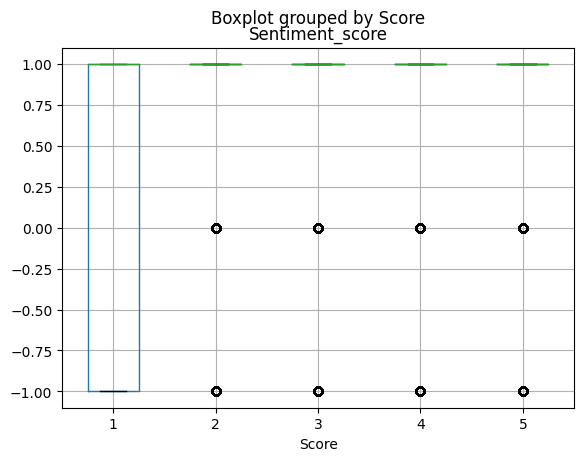

In [100]:
# Box plot of sentiment grouped by stars
df.boxplot(column='Sentiment_score', by='Score') 

# Save the plot
plt.savefig('../reports/images/review_sentiment_score_boxplot.png')

#### Distribution of Sentiment to Product

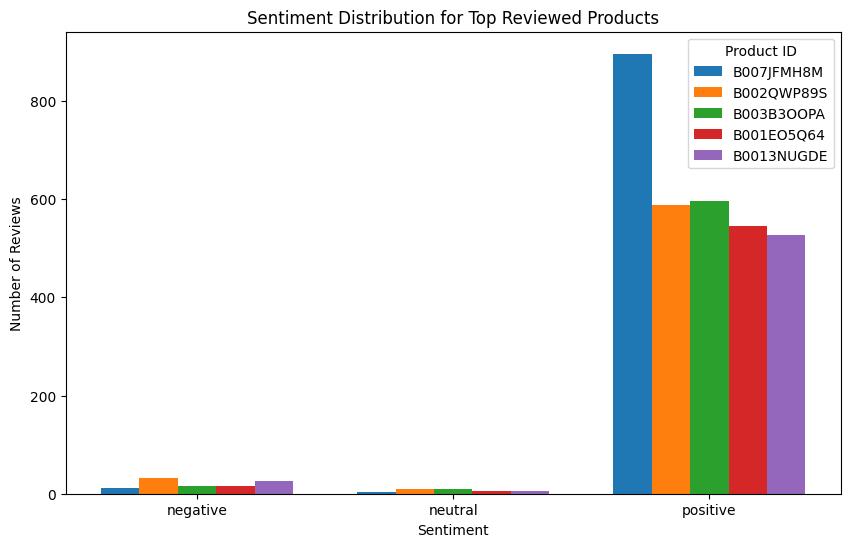

In [101]:
# Group by Sentiment and ProductId, and count the number of each sentiment for each product
sentiment_counts = df.groupby(['Sentiment', 'ProductId']).size().reset_index(name='Count')
 
# Get the top 5 reviewed products in general (irrespective of sentiment)
top_products = df['ProductId'].value_counts().head(5).index
 
# Filter sentiment_counts for only top products
top_product_sentiments = sentiment_counts[sentiment_counts['ProductId'].isin(top_products)]
 
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.15  # the width of the bars
 
# Unique sentiments for x-axis labels
unique_sentiments = top_product_sentiments['Sentiment'].unique()
unique_sentiments.sort()  # Sort sentiments in ascending order
 
for i, product in enumerate(top_products):
    product_data = top_product_sentiments[top_product_sentiments['ProductId'] == product]
    # Calculate bar positions - each product will be offset in each sentiment category
    bar_positions = [x + (i * width) for x in range(len(unique_sentiments))]
    # We'll map each sentiment value to its position in the list
    sentiment_positions = [np.where(unique_sentiments == s)[0][0] for s in product_data['Sentiment']]
    ax.bar(bar_positions, product_data['Count'], width, label=product)
 
ax.set_title('Sentiment Distribution for Top Reviewed Products')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Reviews')
ax.legend(title='Product ID')
 
# Set x-ticks to be at the center of each group of bars
ax.set_xticks([x + width * (len(top_products) - 1) / 2 for x in range(len(unique_sentiments))])
ax.set_xticklabels(unique_sentiments)

# Save the plot
plt.savefig('../reports/images/review_sentiment_to_product.png')
 
plt.show()

#### Analysis of the most frequent words in the reviews

In [102]:
!pip install Pillow

In [103]:
!pip install wordcloud

In [104]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [105]:
df["FinalText"]

0         buy several vitality can dog food product find...
1         product arrive labeled jumbo salt peanut peanu...
2         confection around century light pillowy citrus...
3         look secret ingredient robitussin believe find...
4         great taffy great price wide assortment yummy ...
                                ...                        
393919    great sesame chicken good good resturants eate...
393920    i'm disappoint flavor chocolate note especiall...
393921    star small give one training session try train...
393922    best treat train reward dog good groom low cal...
393923    satisfied product advertise use cereal raw vin...
Name: FinalText, Length: 393924, dtype: object

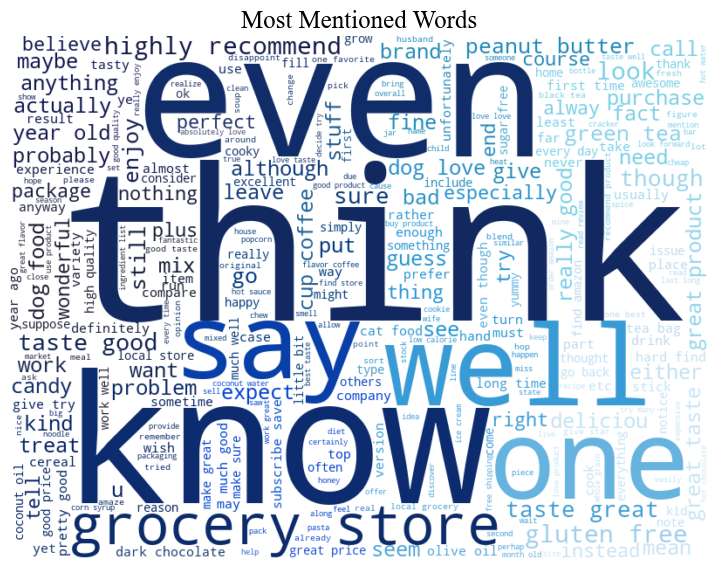

In [106]:
all_text = " ".join(text for text in df["FinalText"])
outmeals_mask = np.array(Image.open("../data/blue_shade.jpg"))
wordcloud_food = WordCloud(background_color="white", 
                          mode="RGBA", 
                          max_words=300, 
                          mask=outmeals_mask).generate(all_text)
image_colors = ImageColorGenerator(outmeals_mask)
plt.figure(figsize=[9,9])
plt.imshow(wordcloud_food.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title("Most Mentioned Words",
          fontname='Times New Roman', fontsize=18)


# Save the plot
plt.savefig('../reports/images/review_image_words.png')

plt.show()

#### Visualise the most frequent words in positive and negative reviews.

In [107]:
from collections import Counter

In [108]:
# Subsets of the DataFrame by sentiment type
positive_df = df[df['Sentiment'] == 'positive']
negative_df = df[df['Sentiment'] == 'negative']
neutral_df = df[df['Sentiment'] == 'neutral']

# Function to tokenize and count words
def count_words(text):
    words = text.split()
    return Counter(words)

# Count words for each sentiment type
positive_text = ' '.join(positive_df['FinalText'])
positive_words = count_words(positive_text)
print("Most frequent words in positive sentiments:")
print(positive_words.most_common(10))

negative_text = ' '.join(negative_df['FinalText'])
negative_words = count_words(negative_text)
print("\nMost frequent words in negative sentiments:")
print(negative_words.most_common(10))

neutral_text = ' '.join(neutral_df['FinalText'])
neutral_words = count_words(neutral_text)
print("\nMost frequent words in neutral sentiments:")
print(neutral_words.most_common(10))


Most frequent words in positive sentiments:
[('like', 181296), ('taste', 169606), ('good', 152588), ('flavor', 130748), ('make', 120106), ('product', 119166), ('one', 118775), ('love', 117299), ('use', 117180), ('great', 114497)]

Most frequent words in negative sentiments:
[('taste', 11234), ('product', 10794), ('get', 8974), ('one', 8764), ('like', 7574), ('buy', 7231), ('bad', 7019), ('use', 6994), ('make', 6374), ('try', 6250)]

Most frequent words in neutral sentiments:
[('product', 2018), ('taste', 1695), ('get', 1681), ('use', 1654), ('buy', 1588), ('one', 1518), ('flavor', 1240), ('make', 1167), ('order', 1130), ('would', 1091)]


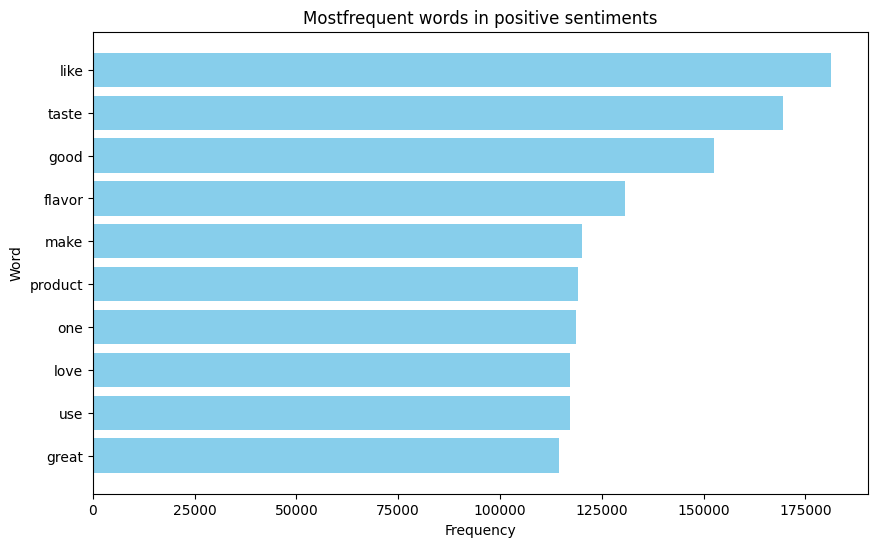

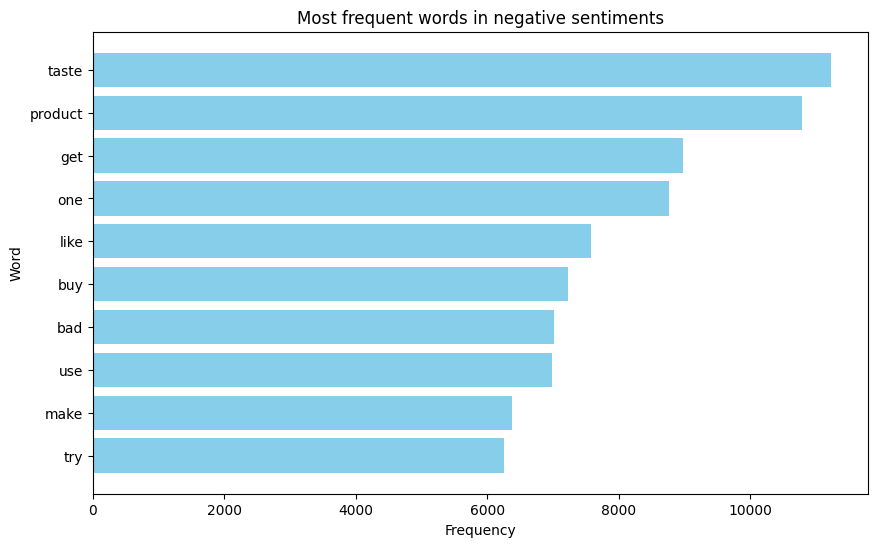

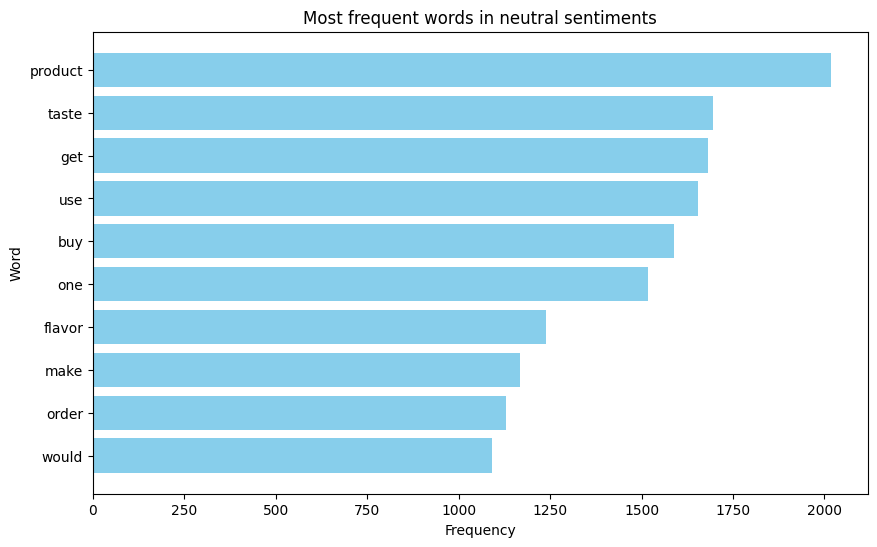

In [112]:
# Function to plot the most frequent words
def plot_most_frequent_words(words, title, sentiment):
    plt.figure(figsize=(10, 6))
    plt.barh([word[0] for word in words], [word[1] for word in words], color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title(title)
    plt.gca().invert_yaxis()
    # Save the plot
    plt.savefig('../reports/images/review_' + sentiment + '.png')
    plt.show()

# Plot most frequent words for each sentiment
plot_most_frequent_words(positive_words.most_common(10), 'Mostfrequent words in positive sentiments', 'positive')
plot_most_frequent_words(negative_words.most_common(10), 'Most frequent words in negative sentiments', 'negative')
plot_most_frequent_words(neutral_words.most_common(10), 'Most frequent words in neutral sentiments', 'neutral')


#### Display the relationship between review Sentiment and Score.

In [113]:
# Create a contingent table between 'Sentiment' y 'Score'
contingency_table = pd.crosstab(df['Sentiment'], df['Score'])
print(contingency_table)

Score          1      2      3      4       5
Sentiment                                    
negative   12055   3679   2828   2191    6381
neutral     2066    872    867    842    3135
positive   22184  16250  26072  53060  241442


In [114]:
# Calculate estadistics "Scorre" for each "Sentiment"
summary_stats = df.groupby('Sentiment')['Score'].describe()
print(summary_stats)

              count      mean       std  min  25%  50%  75%  max
Sentiment                                                       
negative    27134.0  2.526940  1.646335  1.0  1.0  2.0  4.0  5.0
neutral      7782.0  3.270882  1.679460  1.0  1.0  4.0  5.0  5.0
positive   359008.0  4.323998  1.173611  1.0  4.0  5.0  5.0  5.0


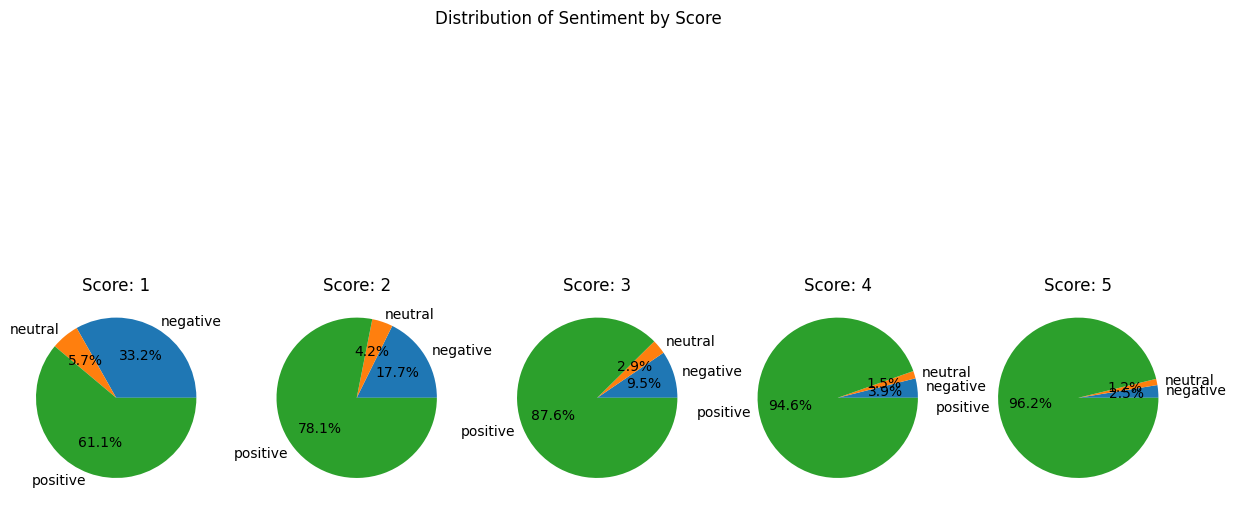

<Figure size 640x480 with 0 Axes>

In [117]:
# Create the pie chart
axs = contingency_table.plot.pie(subplots=True, figsize=(15, 8), autopct='%1.1f%%', legend=None)
# Add Score above the slices
for ax, score in zip(axs, contingency_table.columns):
    ax.set_title(f'Score: {score}', pad=5)
    ax.set_ylabel('')  # Remove the y-label
plt.suptitle('Distribution of Sentiment by Score')
plt.show()
 
# Save the plot
plt.savefig('../reports/images/distr_sentiment_score.png')

plt.show()

#### Create Classification Model of Sentiment

#### Analysis of the length of the reviews.

In [88]:
# Calculate the length of each review
df['ReviewLength'] = df['Text'].apply(len)

In [89]:
df

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Year,Month,CleanText,TokenText,POSTagged,FinalText,WordCount,ReviewLength
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00,2011,4,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...","[(bought, v), (several, a), (vitality, n), (ca...",buy several vitality can dog food product find...,23,263
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00,2012,9,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...","[(product, n), (arrived, v), (labeled, a), (ju...",product arrive labeled jumbo salt peanut peanu...,18,190
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00,2008,8,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...","[(confection, n), (around, None), (centuries, ...",confection around century light pillowy citrus...,40,509
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00,2011,6,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...","[(looking, v), (secret, a), (ingredient, n), (...",look secret ingredient robitussin believe find...,18,219
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00,2012,10,great taffy at a great price. there was a wide...,"[great, taffy, great, price, wide, assortment,...","[(great, a), (taffy, a), (great, a), (price, n...",great taffy great price wide assortment yummy ...,13,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09 01:00:00,2011,3,great for sesame chicken..this is a good if no...,"[great, sesame, chicken, good, better, restura...","[(great, a), (sesame, n), (chicken, n), (good,...",great sesame chicken good good resturants eate...,12,149
568450,B003S1WTCU,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09 01:00:00,2012,3,i'm disappointed with the flavor. the chocolat...,"[i'm, disappointed, flavor, chocolate, notes, ...","[(i'm, n), (disappointed, v), (flavor, n), (ch...",i'm disappoint flavor chocolate note especiall...,25,252
568451,B004I613EE,2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21 01:00:00,2012,2,"these stars are small, so you can give - of th...","[stars, small, give, one, training, session, t...","[(stars, n), (small, a), (give, v), (one, None...",star small give one training session try train...,37,372
568452,B004I613EE,1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13 01:00:00,2012,3,these are the best treats for training and rew...,"[best, treats, training, rewarding, dog, good,...","[(best, a), (treats, n), (training, v), (rewar...",best treat train reward dog good groom low cal...,18,200


In [90]:
#!pip install seaborn

In [91]:
import seaborn as sns

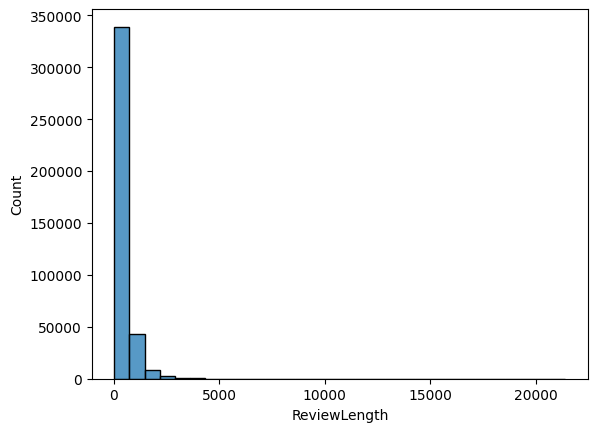

In [92]:
sns.histplot(df['ReviewLength'], bins=30) 
ax.set_title('Distribution of Review Lengths')

# Save the plot
plt.savefig('../reports/images/review_lenghts_distribution.png')

#### Display the relationship between review length and score.

In [93]:
# Calculate the length of each review
df['ReviewLength'] = df['Text'].apply(len)

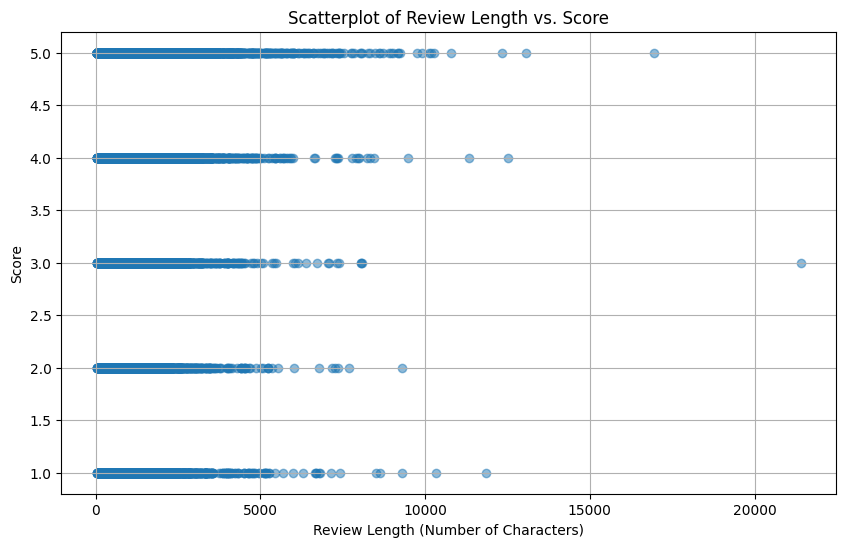

In [94]:
 # Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['ReviewLength'], df['Score'], alpha=0.5)
plt.title('Scatterplot of Review Length vs. Score')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Score')
plt.grid(True)

# Save the plot
plt.savefig('../reports/images/review_lenghts_text_score.png')

plt.show()

### 4. Deep Learning with TensorFlow/Keras

https://www.kaggle.com/code/raman007/amazon-finefood-sentiment-classification-using-knn

#### Prepare Train and Test data

In [118]:
!pip install scikit-learn==0.24.2

In [119]:
# Define X and y.
X = df.FinalText
y = df.Score

#### KNN

In [120]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [121]:
# 10 fold cross validation with inbuilt CV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

myList = list(range(1, 50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_score = []
 
knn = KNeighborsClassifier()  # Ajustar el modelo una sola vez fuera del bucle
for k in neighbors:
    knn.set_params(n_neighbors=k)  # Establecer el valor de k
    scores = cross_val_score(knn, X_train_dtm, y_train, cv=3, scoring='accuracy')  # Usar datos transformados
    cv_score.append(np.round(scores.mean() * 100, 2))
MSE = [100 - x for x in cv_score]
optimal_k = neighbors[MSE.index(min(MSE))]
print(f'Optimal number of neighbors: {optimal_k}')

C:\Users\ana.poveda.garcia\anaconda3\envs\PROJECT\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ana.poveda.garcia\anaconda3\envs\PROJECT\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the v

KeyboardInterrupt: 

In [ ]:
# Plot misclassification error vs k
plt.figure(figsize=(15, 10))
plt.plot(neighbors, MSE)
 
for xy in zip(neighbors, np.round(MSE, 3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
 
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Number of Neighbors K')
# Save the plot
plt.savefig('../reports/images/misclassification_error_KNN.png')
plt.show()
 
print("The misclassification error for each k value is:", np.round(MSE, 3))

In [ ]:
# Define and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_dtm,y_train)

# Make predictions
pred_train = knn.predict(X_train_dtm)
pred_test = knn.predict(X_test_dtm)

In [ ]:
# Evaluate the model
print("Train Recall : ",metrics.recall_score(y_train,pred_train, average='weighted'))
print("Test Recall : ", metrics.recall_score(y_test,pred_test, average='weighted'))
print("Train Precision : ",metrics.precision_score(y_train,pred_train, average='weighted'))
print("Test Precision : ",metrics.precision_score(y_test,pred_test, average='weighted'))
print("Train Accuracy :", metrics.f1_score(y_train,pred_train, average='weighted'))
print("Test Accuracy :", metrics.f1_score(y_test,pred_test, average='weighted'))

#### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Vectorize text data
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Range of 'n_estimators' for Random Forest
n_estimators_range = range(10, 101, 10)  # Example: 10, 20, ..., 100

# List to store cross-validation scores
cv_scores = []

# StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation for each number of trees
for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf, X_train_dtm, y_train, cv=stratified_kfold, scoring='accuracy')
    cv_scores.append(np.round(scores.mean() * 100, 2))
    
# You can also calculate other metrics such as precision, recall, f1-score etc.
# Convert accuracy to MSE for comparison (if needed)
MSE = [100 - x for x in cv_scores]

optimal_estimator = n_estimators_range[MSE.index(min(MSE))]
print(f'Optimal number of estimators (based on min MSE): {optimal_estimator_mse}')

# You might want to select the best model based on cross-validation and fit it to the entire training set,
# then evaluate it on the test set.

In [ ]:
# Plot misclassification error vs estimator
plt.figure(figsize=(15, 10))
plt.plot(n_estimators_range, MSE)
for xy in zip(n_estimators_range, np.round(MSE, 3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('Number of Estimator')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Number of Estimator')
# Save the plot
plt.savefig('../reports/images/misclassification_error_RF.png')
plt.show()
print("The misclassification error for each Estimator value is:", np.round(MSE, 3))

In [ ]:
# Define and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=optimal_estimator, random_state=42)
rf_classifier.fit(X_train_dtm, y_train)
# Make predictions
pred_train = rf_classifier.predict(X_train_dtm)
pred_test = rf_classifier.predict(X_test_dtm)

In [ ]:
# Evaluate the model
print("Train Recall : ",metrics.recall_score(y_train,pred_train, average='weighted'))
print("Test Recall : ", metrics.recall_score(y_test,pred_test, average='weighted'))
print("Train Precision : ",metrics.precision_score(y_train,pred_train, average='weighted'))
print("Test Precision : ",metrics.precision_score(y_test,pred_test, average='weighted'))
print("Train Accuracy :", metrics.f1_score(y_train,pred_train, average='weighted'))
print("Test Accuracy :", metrics.f1_score(y_test,pred_test, average='weighted'))

#### Use a reduce dataset

##### Choose only 20% or each type Score

In [189]:
# Assuming 'df' is your DataFrame
score_counts = df['Score'].value_counts().sort_index()
score_counts

Score
1     36305
2     20801
3     29767
4     56093
5    250958
Name: count, dtype: int64

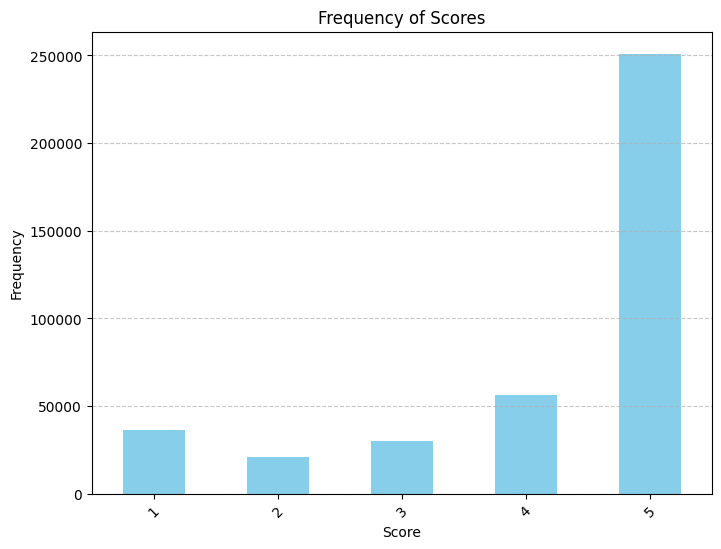

In [190]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
score_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [191]:
# Calculate the size of the sample for each value in 'Score'
sample_size = (score_counts * 0.2).astype(int)
sample_size

Score
1     7261
2     4160
3     5953
4    11218
5    50191
Name: count, dtype: int32

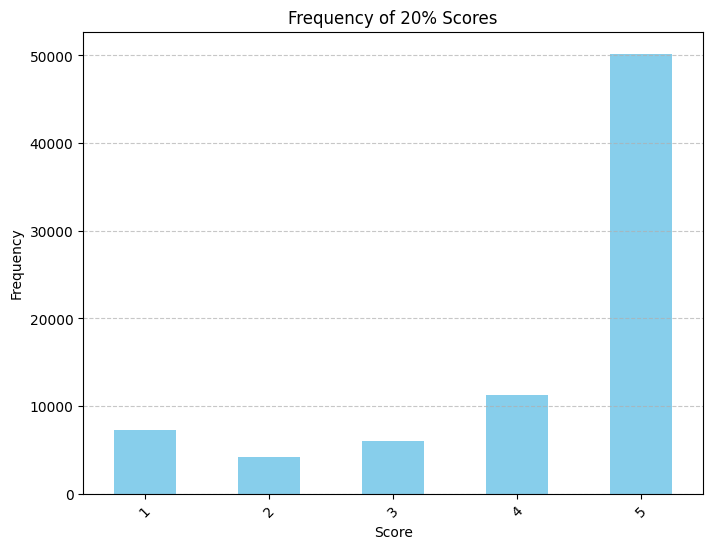

In [192]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
sample_size.plot(kind='bar', color='skyblue')
plt.title('Frequency of 20% Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [198]:
# Create an empty DataFrame to store the sampled data
sampled_df = pd.DataFrame(columns=df.columns)

# Concatenate the sampled data for each score
sampled_data = pd.concat([
    df[df['Score'] == score].sample(n=sample_size[score], random_state=42) 
    for score in range(1, 6)
])

# Shuffle the sampled data
sampled_data = sampled_data.sample(frac=1, random_state=42)

# Convert sampled_data to a DataFrame
sampled_df = pd.DataFrame(sampled_data)

# Verify the distribution of scores in the sampled DataFrame
print(sampled_df['Score'].value_counts().sort_index())

Score
1     7261
2     4160
3     5953
4    11218
5    50191
Name: count, dtype: int64


In [199]:
# Save DataFrame
sampled_df.to_csv('../data/reviews_sample_reduce_20.csv', index=False)

In [200]:
sampled_df = pd.read_csv('../data/reviews_sample_reduce_20.csv')

In [201]:
sampled_df.head(2)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Year,Month,CleanText,TokenText,POSTagged,FinalText,WordCount,ReviewLength,Sentiment,Sentiment_score
0,B004Z33GI6,1,2,5,1329264000,AMAZING AND ADDICTING!,This is the best and most delicious 0-cal drin...,2012-02-15 01:00:00,2012,2,this is the best and most delicious -cal drink...,"['best', 'delicious', 'cal', 'drink', 'think',...","[('best', 'r'), ('delicious', 'a'), ('cal', 'a...",best delicious cal drink think people like tas...,26,344,positive,1
1,B000XS6RJW,0,0,5,1350691200,LID Green Pea and Duck,"Our cats are, at various levels of severity, a...",2012-10-20 02:00:00,2012,10,"our cats are, at various levels of severity, a...","['cats', 'various', 'levels', 'severity', 'all...","[('cats', 'n'), ('various', 'a'), ('levels', '...",cat various level severity allergic regular dr...,46,492,positive,1


In [203]:
sampled_df.shape

(78783, 18)

In [204]:
# Define X and y.
X = sampled_df.FinalText
y = sampled_df.Score

##### Random Forest with CountVectorizer + TruncatedSVD = 50

In [205]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

In [206]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Vectorize text data
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

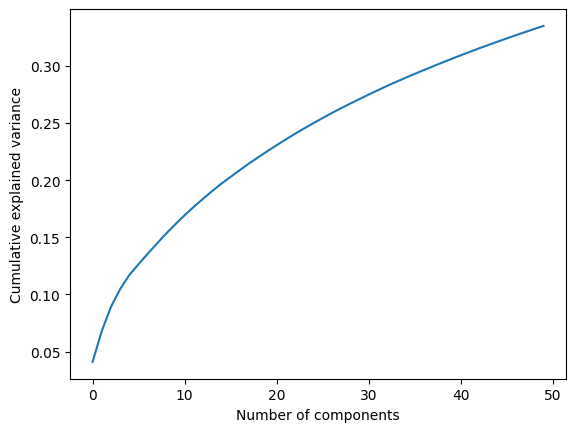

In [207]:
# TruncatedSVD with different number of components
svd = TruncatedSVD(n_components=50)
svd.fit(X_train_dtm)

# Show the plot of accumulate variance 
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [211]:
# Reduce with SVD
svd = TruncatedSVD(n_components=50)  # Number of principal components
X_train_svd = svd.fit_transform(X_train_dtm)
X_test_svd = svd.transform(X_test_dtm)

In [212]:
optimal_estimator = 10

In [213]:
# Define and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=optimal_estimator, random_state=42)
rf_classifier.fit(X_train_svd, y_train)

# Make predictions
pred_train = rf_classifier.predict(X_train_svd)
pred_test = rf_classifier.predict(X_test_svd)

In [214]:
# Evaluate the model
print("Train Recall : ",metrics.recall_score(y_train,pred_train, average='weighted'))
print("Test Recall : ", metrics.recall_score(y_test,pred_test, average='weighted'))
print("Train Precision : ",metrics.precision_score(y_train,pred_train, average='weighted'))
print("Test Precision : ",metrics.precision_score(y_test,pred_test, average='weighted'))
print("Train Accuracy :", metrics.f1_score(y_train,pred_train, average='weighted'))
print("Test Accuracy :", metrics.f1_score(y_test,pred_test, average='weighted'))

Train Recall :  0.9888617395995304
Test Recall :  0.6076029701085232
Train Precision :  0.9889458583039293
Test Precision :  0.509746430362986
Train Accuracy : 0.9888218423211054
Test Accuracy : 0.5405778799930239


##### Random Forest with TfidfVectorizer(5k) + TruncatedSVD = 100

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [216]:
optimal_estimator = 10

In [217]:
# Step 1: Text Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max number of features as needed
X_vectorized = vectorizer.fit_transform(X)

# Step 2: Dimensionality Reduction
svd = TruncatedSVD(n_components=100)  # Adjust number of components as needed
X_svd = svd.fit_transform(X_vectorized)

# Step 3: Inverse Frequency Transformation (If needed)

# Step 4: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

# Step 5: Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=optimal_estimator, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the model
accuracy = rf_model.score(X_test, y_test)
print('Accuracy:', accuracy)

# Make predictions
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

Accuracy: 0.6249920670178334


In [219]:
# Evaluate the model
print("Train Recall : ",metrics.recall_score(y_train,pred_train, average='weighted'))
print("Test Recall : ", metrics.recall_score(y_test,pred_test, average='weighted'))
print("Train Precision : ",metrics.precision_score(y_train,pred_train, average='weighted'))
print("Test Precision : ",metrics.precision_score(y_test,pred_test, average='weighted'))
print("Train Accuracy :", metrics.f1_score(y_train,pred_train, average='weighted'))
print("Test Accuracy :", metrics.f1_score(y_test,pred_test, average='weighted'))

Train Recall :  0.9898771935391744
Test Recall :  0.6249920670178334
Train Precision :  0.9899607986043646
Test Precision :  0.528768527736136
Train Accuracy : 0.9898400990259401
Test Accuracy : 0.5595086408933714


##### Random Forest with TfidfVectorizer(5k) +TruncatedSVD = 100 + CV + Find n_stimators(10-50)

In [220]:
# Step 1: Text Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max number of features as needed
X_vectorized = vectorizer.fit_transform(X)

# Step 2: Dimensionality Reduction
svd = TruncatedSVD(n_components=100)  # Adjust number of components as needed
X_svd = svd.fit_transform(X_vectorized)

# Step 3: Inverse Frequency Transformation (If needed)

# Step 4: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)


# Range of 'n_estimators' for Random Forest
n_estimators_range = range(10, 51, 10)  # Example: 10, 20, ..., 100
 
# List to store cross-validation scores
cv_scores = []
 
# StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
 
# Cross-validation for each number of trees
for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
    cv_scores.append(np.round(scores.mean() * 100, 2))
# You can also calculate other metrics such as precision, recall, f1-score etc.
# Convert accuracy to MSE for comparison (if needed)
MSE = [100 - x for x in cv_scores]

optimal_estimator = n_estimators_range[MSE.index(min(MSE))]
print(f'Optimal number of estimators (based on min MSE): {optimal_estimator}')

Optimal number of estimators (based on min MSE): 50


In [221]:
print(f'Optimal number of estimators (based on min MSE): {optimal_estimator}')

Optimal number of estimators (based on min MSE): 50


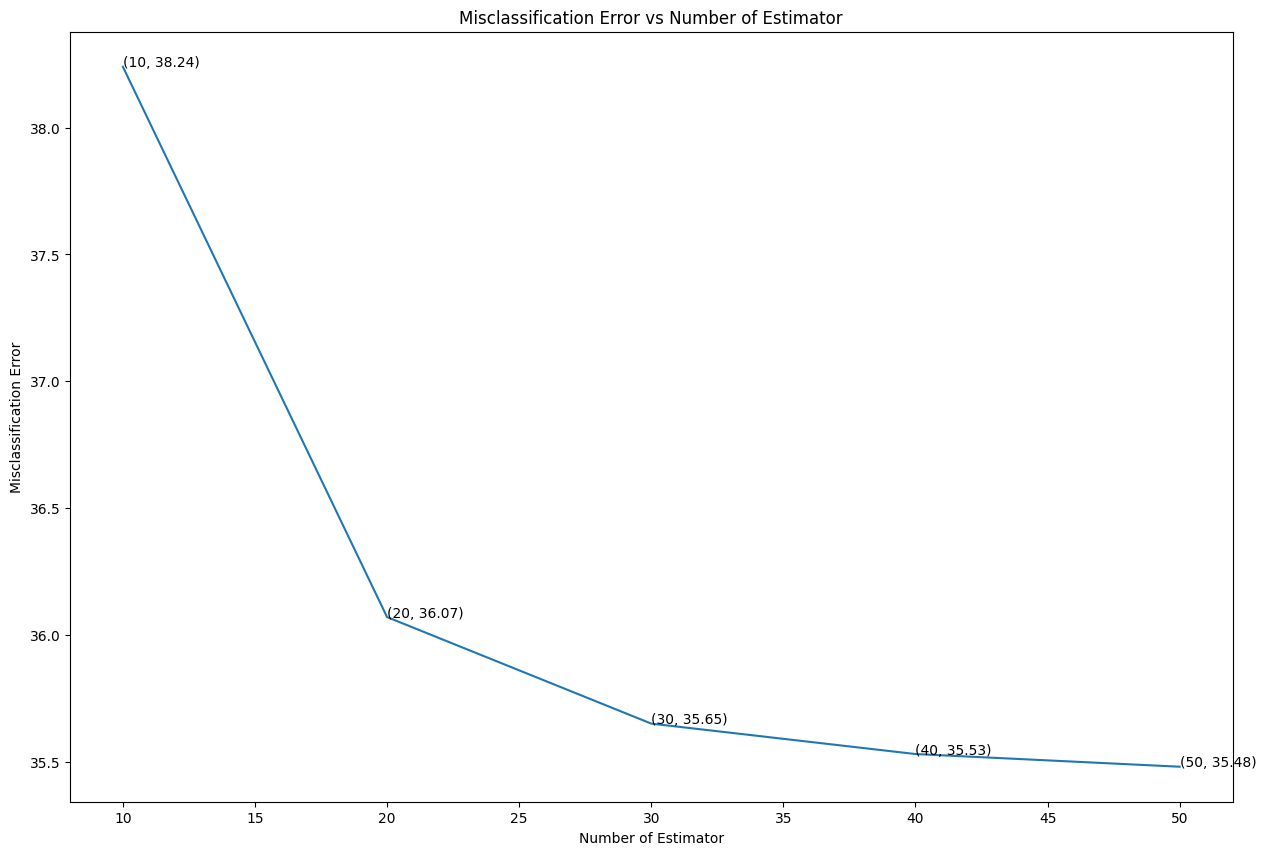

The misclassification error for each Estimator value is: [38.24 36.07 35.65 35.53 35.48]


In [222]:
# Plot misclassification error vs estimator
plt.figure(figsize=(15, 10))
plt.plot(n_estimators_range, MSE)
for xy in zip(n_estimators_range, np.round(MSE, 3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('Number of Estimator')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Number of Estimator')
# Save the plot
plt.savefig('../reports/images/misclassification_error_RF.png')
plt.show()
print("The misclassification error for each Estimator value is:", np.round(MSE, 3))

In [223]:
# Step 5: Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=optimal_estimator, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the model
accuracy = rf_model.score(X_test, y_test)
print('Accuracy:', accuracy)

# Make predictions
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

Accuracy: 0.6584375198324555


In [224]:
# Evaluate the model
print("Train Recall : ",metrics.recall_score(y_train,pred_train, average='weighted'))
print("Test Recall : ", metrics.recall_score(y_test,pred_test, average='weighted'))
print("Train Precision : ",metrics.precision_score(y_train,pred_train, average='weighted'))
print("Test Precision : ",metrics.precision_score(y_test,pred_test, average='weighted'))
print("Train Accuracy :", metrics.f1_score(y_train,pred_train, average='weighted'))
print("Test Accuracy :", metrics.f1_score(y_test,pred_test, average='weighted'))

Train Recall :  0.9998096023863168
Test Recall :  0.6584375198324555
Train Precision :  0.9998096347983747
Test Precision :  0.5498472531290927
Train Accuracy : 0.9998095817527357
Test Accuracy : 0.5466132166676401


##### Random Forest with TfidfVectorizer(5k) +TruncatedSVD = 100 + CV + Find n_stimators(10-100)

In [225]:
# Step 1: Text Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max number of features as needed
X_vectorized = vectorizer.fit_transform(X)

# Step 2: Dimensionality Reduction
svd = TruncatedSVD(n_components=100)  # Adjust number of components as needed
X_svd = svd.fit_transform(X_vectorized)

# Step 3: Inverse Frequency Transformation (If needed)

# Step 4: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)


# Range of 'n_estimators' for Random Forest
n_estimators_range = range(10, 101, 10)  # Example: 10, 20, ..., 100
 
# List to store cross-validation scores
cv_scores = []
 
# StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
 
# Cross-validation for each number of trees
for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
    cv_scores.append(np.round(scores.mean() * 100, 2))
# You can also calculate other metrics such as precision, recall, f1-score etc.
# Convert accuracy to MSE for comparison (if needed)
MSE = [100 - x for x in cv_scores]

optimal_estimator = n_estimators_range[MSE.index(min(MSE))]
print(f'Optimal number of estimators (based on min MSE): {optimal_estimator}')

Optimal number of estimators (based on min MSE): 40


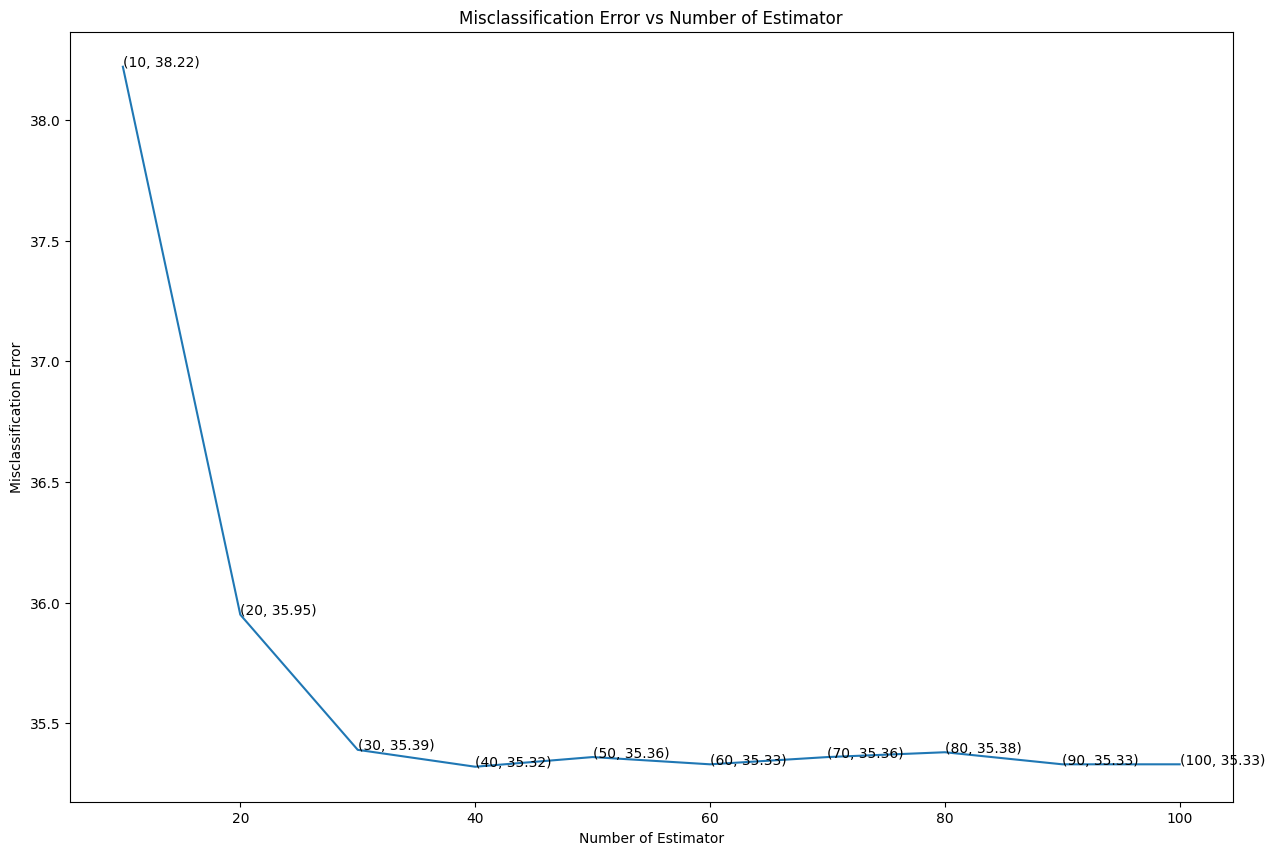

The misclassification error for each Estimator value is: [38.22 35.95 35.39 35.32 35.36 35.33 35.36 35.38 35.33 35.33]


In [226]:
# Plot misclassification error vs estimator
plt.figure(figsize=(15, 10))
plt.plot(n_estimators_range, MSE)
for xy in zip(n_estimators_range, np.round(MSE, 3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('Number of Estimator')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Number of Estimator')
# Save the plot
plt.savefig('../reports/images/misclassification_error_RF.png')
plt.show()
print("The misclassification error for each Estimator value is:", np.round(MSE, 3))

In [227]:
# Step 5: Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=optimal_estimator, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the model
accuracy = rf_model.score(X_test, y_test)
print('Accuracy:', accuracy)

# Make predictions
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

Accuracy: 0.6583740559751222


In [228]:
# Evaluate the model
print("Train Recall : ",metrics.recall_score(y_train,pred_train, average='weighted'))
print("Test Recall : ", metrics.recall_score(y_test,pred_test, average='weighted'))
print("Train Precision : ",metrics.precision_score(y_train,pred_train, average='weighted'))
print("Test Precision : ",metrics.precision_score(y_test,pred_test, average='weighted'))
print("Train Accuracy :", metrics.f1_score(y_train,pred_train, average='weighted'))
print("Test Accuracy :", metrics.f1_score(y_test,pred_test, average='weighted'))

Train Recall :  0.9997144035794752
Test Recall :  0.6583740559751222
Train Precision :  0.9997144890650886
Test Precision :  0.5569932225830452
Train Accuracy : 0.9997143635424836
Test Accuracy : 0.5505156612411695


##### Random Forest with Word2Vec + TruncatedSVD = 50 **(OPTIONAL)**

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
 
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)  # You may need to adjust parameters
 
# Vectorize text data using Word2Vec
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector
 
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features) for tokenized_sentence in corpus]
    return np.array(features)
 
X_train_w2v = averaged_word_vectorizer(X_train, word2vec_model, 100)  # Assuming vector_size=100
X_test_w2v = averaged_word_vectorizer(X_test, word2vec_model, 100)  # Assuming vector_size=100
 
# # Range of 'n_estimators' for Random Forest
# n_estimators_range = range(10, 101, 10)  # Example: 10, 20, ..., 100
 
# # List to store cross-validation scores
# cv_scores = []
 
# # StratifiedKFold for cross-validation
# stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
 
# # Cross-validation for each number of trees
# for n_estimators in n_estimators_range:
#     rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
#     scores = cross_val_score(rf, X_train_w2v, y_train, cv=stratified_kfold, scoring='accuracy')
#     cv_scores.append(np.round(scores.mean() * 100, 2))
# # You can also calculate other metrics such as precision, recall, f1-score etc.
# # Convert accuracy to MSE for comparison (if needed)
# MSE = [100 - x for x in cv_scores]
 
# optimal_estimator = n_estimators_range[MSE.index(min(MSE))]
# print(f'Optimal number of estimators (based on min MSE): {optimal_estimator}')
 
# You might want to select the best model based on cross-validation and fit it to the entire training set,
# then evaluate it on the test set.

In [ ]:
optimal_estimator = 10

In [ ]:
# Define and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=optimal_estimator, random_state=42)
rf_classifier.fit(X_train_svd, y_train)

# Make predictions
pred_train = rf_classifier.predict(X_train_svd)
pred_test = rf_classifier.predict(X_test_svd)

In [ ]:
# Evaluate the model
print("Train Recall : ",metrics.recall_score(y_train,pred_train, average='weighted'))
print("Test Recall : ", metrics.recall_score(y_test,pred_test, average='weighted'))
print("Train Precision : ",metrics.precision_score(y_train,pred_train, average='weighted'))
print("Test Precision : ",metrics.precision_score(y_test,pred_test, average='weighted'))
print("Train Accuracy :", metrics.f1_score(y_train,pred_train, average='weighted'))
print("Test Accuracy :", metrics.f1_score(y_test,pred_test, average='weighted'))

### 5. Parameter Tuning

#### Grid Search

### 6. Integration with Azure ML

In [12]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

#### Create Client

In [13]:
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="2e8f6992-4aea-495a-aeed-5d3e1c4c90c9",
    resource_group_name="valentina.cabbia-rg",
    workspace_name="project-capstone",
)


#### Create a compute instance for training

Created in Azure ML. 

Name: **computer-capstone**

#### Create a job  environment

##### Creating an Environment for Azure Machine Learning

In [14]:
import os

dependencies_dir = "./dependencies"
os.makedirs(dependencies_dir, exist_ok=True)

##### Writing the Conda YAML File

In [15]:
%%writefile {dependencies_dir}/conda.yml
name: model-env
channels:
  - conda-forge
dependencies:
  - python=3.8
  - numpy=1.21.2
  - pip=21.2.4
  - scikit-learn=0.24.2
  - scipy=1.7.1
  - pandas>=1.1,<1.2
  - pip:
    - inference-schema[numpy-support]==1.3.0
    - mlflow== 2.10.2
    - azureml-mlflow==1.42.0
    - psutil>=5.8,<5.9
    - tqdm>=4.59,<4.60
    - ipykernel~=6.0
    - matplotlib

Writing ./dependencies/conda.yml


##### The Conda YAML File

In [16]:
!az login

[
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "id": "2e8f6992-4aea-495a-aeed-5d3e1c4c90c9",
    "isDefault": true,
    "managedByTenants": [],
    "name": "Azure subscription 1",
    "state": "Enabled",
    "tenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "user": {
      "name": "valentina.cabbia@avanade.com",
      "type": "user"
    }
  },
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "id": "8f4ad375-12d9-48d5-867b-c88108771392",
    "isDefault": false,
    "managedByTenants": [],
    "name": "Visual Studio Enterprise Subscription",
    "state": "Disabled",
    "tenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "user": {
      "name": "valentina.cabbia@avanade.com",
      "type": "user"
    }
  }
]


In [17]:
from azure.ai.ml.entities import Environment

custom_env_name = "aml-scikit-learn-project_capstone"

custom_job_env = Environment(
    name=custom_env_name,
    description="Custom environment for Credit Card Defaults job",
    tags={"scikit-learn": "0.24.2"},
    conda_file=os.path.join(dependencies_dir, "conda.yml"),
    image="mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04:latest",
)
custom_job_env = ml_client.environments.create_or_update(custom_job_env)

print(
    f"Environment with name {custom_job_env.name} is registered to workspace, the environment version is {custom_job_env.version}"
)

Environment with name aml-scikit-learn-project_capstone is registered to workspace, the environment version is 1


### Create component 1: data preparation

In [18]:
import os

data_prep_src_dir = "./components/data_prep"
os.makedirs(data_prep_src_dir, exist_ok=True)

In [51]:
%%writefile {data_prep_src_dir}/data_prep.py
import os
import argparse
import pandas as pd
from sklearn.model_selection import train_test_split
import logging
import mlflow
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


def remove_urls(text):
    # Remove URLs from text
    return re.sub(r'http\S+', '', text)

def remove_html_tags(text):
    # Remove HTML tags from text
    return BeautifulSoup(text, 'html.parser').get_text()

def remove_numbers(text):
    # Remove numbers from text
    return re.sub(r'\d+', '', text)

def preprocess_text(text):
    # Remove URLs, HTML tags, numbers, and convert to lowercase
    text = remove_urls(text)
    text = remove_html_tags(text)
    text = remove_numbers(text)
    text = text.lower()
    return text

def tokenize_and_lemmatize(text):
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Part-of-speech tagging
    pos_tags = nltk.pos_tag(tokens)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for token, pos_tag in pos_tags:
        pos = pos_tag[0].lower()  # Convert Penn Treebank POS tags to WordNet POS tags
        pos = pos if pos in ['a', 'r', 'n', 'v'] else None  # Map POS tags to WordNet tags
        lemma = lemmatizer.lemmatize(token, pos=pos) if pos else token
        lemmatized_tokens.append(lemma)
    
    return ' '.join(lemmatized_tokens)


def main():
    """Main function of the script."""

    # input and output arguments
    parser = argparse.ArgumentParser()
    parser.add_argument("--data", type=str, help="path to input data")
    parser.add_argument("--text_column", type=str, help="name of the text column")
    parser.add_argument("--test_train_ratio", type=float, required=False, default=0.20)
    parser.add_argument("--train_data", type=str, help="path to train data")
    parser.add_argument("--test_data", type=str, help="path to test data")
    args = parser.parse_args()

    # Start Logging
    mlflow.start_run()

    print(" ".join(f"{k}={v}" for k, v in vars(args).items()))

    print("input data:", args.data)

    credit_df = pd.read_csv(args.data, header=1, index_col=0)


    ##### Text Preprocessing #####

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    credit_df[args.text_column] = df[args.text_column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

    # Preprocess text (remove URLs, HTML tags, numbers, and convert to lowercase)
    credit_df[args.text_column] = df[args.text_column].apply(preprocess_text)

    # Tokenize and lemmatize text
    credit_df[args.text_column] = df[args.text_column].apply(tokenize_and_lemmatize)

    # Vectorize text
    vectorizer = TfidfVectorizer(max_features=5000)
    X_vectorized = vectorizer.fit_transform(df[args.text_column])

    # Reduce dimensionality with SVD
    svd = TruncatedSVD(n_components=100)
    X_svd = svd.fit_transform(X_vectorized)

    credit_df[args.text_column] = X_svd

    ############################

    mlflow.log_metric("num_samples", credit_df.shape[0])
    mlflow.log_metric("num_features", credit_df.shape[1] - 1)


    credit_train_df, credit_test_df = train_test_split(
        credit_df,
        test_size=args.test_train_ratio,
    )

    # output paths are mounted as folder, therefore, we are adding a filename to the path
    credit_train_df.to_csv(os.path.join(args.train_data, "data.csv"), index=False)

    credit_test_df.to_csv(os.path.join(args.test_data, "data.csv"), index=False)

    # Stop Logging
    mlflow.end_run()


if __name__ == "__main__":
    main()

Overwriting ./components/data_prep/data_prep.py


In [21]:
from azure.ai.ml import command
from azure.ai.ml import Input, Output

data_prep_component = command(
    name="data_prep_credit_defaults",
    display_name="Data preparation for training",
    description="reads a .xl input, split the input to train and test",
    inputs={
        "data": Input(type="uri_folder"),
        "test_train_ratio": Input(type="number"),
    },
    outputs=dict(
        train_data=Output(type="uri_folder", mode="rw_mount"),
        test_data=Output(type="uri_folder", mode="rw_mount"),
    ),
    # The source folder of the component
    code=data_prep_src_dir,
    command="""python data_prep.py \
            --data ${{inputs.data}} --test_train_ratio ${{inputs.test_train_ratio}} \
            --train_data ${{outputs.train_data}} --test_data ${{outputs.test_data}} \
            --text_column 'Text' \
            """,
    environment=f"{custom_job_env.name}:{custom_job_env.version}",
)


### Create component 2: training

In [52]:
import os

train_src_dir = "./components/train"
os.makedirs(train_src_dir, exist_ok=True)

In [53]:
%%writefile {train_src_dir}/train.py
import argparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import os
import pandas as pd
import mlflow
 
 
def select_first_file(path):
    """Selects first file in folder, use under assumption there is only one file in folder
    Args:
        path (str): path to directory or file to choose
    Returns:
        str: full path of selected file
    """
    files = os.listdir(path)
    return os.path.join(path, files[0])
 
 
# Start Logging
mlflow.start_run()
 
# enable autologging
mlflow.sklearn.autolog()
 
os.makedirs("./outputs", exist_ok=True)
 
 
def main():
    """Main function of the script."""
 
    # input and output arguments
    parser = argparse.ArgumentParser()
    parser.add_argument("--train_data", type=str, help="path to train data")
    parser.add_argument("--test_data", type=str, help="path to test data")
    parser.add_argument("--n_estimators", required=False, default=100, type=int)
    parser.add_argument("--registered_model_name", type=str, help="model name")
    parser.add_argument("--model", type=str, help="path to model file")
    args = parser.parse_args()
 
    # paths are mounted as folder, therefore, we are selecting the file from folder
    train_df = pd.read_csv(select_first_file(args.train_data))
 
    # Extracting the label column
    y_train = train_df.pop("Score")
 
    # convert the dataframe values to array
    X_train = train_df.values
 
    # paths are mounted as folder, therefore, we are selecting the file from folder
    test_df = pd.read_csv(select_first_file(args.test_data))
 
    # Extracting the label column
    y_test = test_df.pop("Score")
 
    # convert the dataframe values to array
    X_test = test_df.values
 
    print(f"Training with data of shape {X_train.shape}")
 
    clf = RandomForestClassifier(n_estimators=args.n_estimators)
    clf.fit(X_train, y_train)
 
    y_pred = clf.predict(X_test)
 
    print(classification_report(y_test, y_pred))
 
    # Registering the model to the workspace
    print("Registering the model via MLFlow")
    mlflow.sklearn.log_model(
        sk_model=clf,
        registered_model_name=args.registered_model_name,
        artifact_path=args.registered_model_name,
    )
 
    # Saving the model to a file
    mlflow.sklearn.save_model(
        sk_model=clf,
        path=os.path.join(args.model, "trained_model"),
    )
 
    # Stop Logging
    mlflow.end_run()
 
 
if __name__ == "__main__":
    main()

Overwriting ./components/train/train.py


In [54]:
%%writefile {train_src_dir}/train.yml
# <component>
name: train_credit_defaults_model
display_name: Train_Credit_Defaults_Model
# version: 1 # Not specifying a version will automatically update the version
type: command
inputs:
  train_data: 
    type: uri_folder
  test_data: 
    type: uri_folder
  n_estimators:
    type: number
  registered_model_name:
    type: string
outputs:
  model:
    type: uri_folder
code: .
environment:
  # for this step, we'll use an AzureML curate environment
  azureml:AzureML-sklearn-1.0-ubuntu20.04-py38-cpu:1
command: >-
  python train.py 
  --train_data ${{inputs.train_data}} 
  --test_data ${{inputs.test_data}} 
  --n_estimators ${{inputs.n_estimators}}
  --registered_model_name ${{inputs.registered_model_name}} 
  --model ${{outputs.model}}
# </component>

Overwriting ./components/train/train.yml


In [ ]:
# importing the Component Package
from azure.ai.ml import load_component

# Loading the component from the yml file
train_component = load_component(source=os.path.join(train_src_dir, "train.yml"))

# Now we register the component to the workspace
train_component = ml_client.create_or_update(train_component)

# Create (register) the component in your workspace
print(
    f"Component {train_component.name} with Version {train_component.version} is registered"
)

### Create the pipeline from components

In [ ]:
from azure.ai.ml import dsl, Input, Output
 
@dsl.pipeline(
    compute="computer-capstone",
    description="E2E data_prep-train pipeline",
)
def credit_defaults_pipeline(
    pipeline_job_data_input,
    pipeline_job_test_train_ratio,
    pipeline_job_n_estimators,
    pipeline_job_registered_model_name,
):
    # using data_prep_component like a python call with its own inputs
    data_prep_job = data_prep_component(
        data=pipeline_job_data_input,
        test_train_ratio=pipeline_job_test_train_ratio,
    )
 
    # using train_component like a python call with its own inputs
    train_job = train_component(
        train_data=data_prep_job.outputs.train_data,  # note: using outputs from previous step
        test_data=data_prep_job.outputs.test_data,  # note: using outputs from previous step
        n_estimators=pipeline_job_n_estimators,  # note: using a pipeline input as parameter
        registered_model_name=pipeline_job_registered_model_name,
    )
 
    # a pipeline returns a dictionary of outputs
    # keys will code for the pipeline output identifier
    return {
        "pipeline_job_train_data": data_prep_job.outputs.train_data,
        "pipeline_job_test_data": data_prep_job.outputs.test_data,
    }

### Instantiate a pipeline with your dataset

In [ ]:
# Save DataFrame
df[['Text', 'Score']].to_csv('../data/reviews_job.csv', index=False)

In [36]:
df = pd.read_csv('../data/reviews_job.csv')

In [37]:
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


### Add data set

In [38]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes
import time

In [40]:
# Create the data asset
my_path = "../data/reviews_job.csv"
 
# Set the version number of the data asset to the current UTC time
v1 = time.strftime("%Y.%m.%d.%H%M%S", time.gmtime())
 
 
my_data = Data(
    name="reviews_job",
    version=v1,
    description="Reviews of Food",
    path=my_path,
    type=AssetTypes.URI_FILE,
)
 
# Create data asset
ml_client.data.create_or_update(my_data)
 
print(f"Data asset created. Name: {my_data.name}, version: {my_data.version}")

Data asset created. Name: reviews_job, version: 2024.03.06.142500


In [41]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

web_path = "https://projectcapston5257248996.blob.core.windows.net/azureml-blobstore-1f9450cd-3b31-431c-b8fc-b78c6421e312/LocalUpload/442254634d502d308876b2c2ba857f70/reviews_job.csv"

credit_data = Data(
    name="reviews_amazon",
    path=web_path,
    type=AssetTypes.URI_FILE,
    description="Dataset",
    tags={"source_type": "web", "source": "UCI ML Repo"},
    version="1.0.0",
)

In [49]:
registered_model_name = "random_forest_review"
 
# Let's instantiate the pipeline with the parameters of our choice
pipeline = credit_defaults_pipeline(
    pipeline_job_data_input=Input(type="uri_file", path=credit_data.path),
    pipeline_job_test_train_ratio=0.20,
    pipeline_job_n_estimators=100,  # Cambia el valor según sea necesario
    pipeline_job_registered_model_name=registered_model_name,
)

### Submit the job

In [50]:
# submit the pipeline job
pipeline_job = ml_client.jobs.create_or_update(
    pipeline,
    # Project's name
    experiment_name="e2e_registered_components",
)
ml_client.jobs.stream(pipeline_job.name)

Uploading data_prep (0.0 MBs): 100%|############################################| 3930/3930 [00:00<00:00, 25678.73it/s]




RunId: shy_caravan_rw5s3vhrhc
Web View: https://ml.azure.com/runs/shy_caravan_rw5s3vhrhc?wsid=/subscriptions/2e8f6992-4aea-495a-aeed-5d3e1c4c90c9/resourcegroups/valentina.cabbia-rg/workspaces/project-capstone

Streaming logs/azureml/executionlogs.txt

[2024-03-06 14:33:28Z] Submitting 1 runs, first five are: 3ef38f16:ba2bcc5c-1154-483e-9a42-2c480f15dd13
[2024-03-06 14:35:13Z] Execution of experiment failed, update experiment status and cancel running nodes.

Execution Summary
RunId: shy_caravan_rw5s3vhrhc
Web View: https://ml.azure.com/runs/shy_caravan_rw5s3vhrhc?wsid=/subscriptions/2e8f6992-4aea-495a-aeed-5d3e1c4c90c9/resourcegroups/valentina.cabbia-rg/workspaces/project-capstone


JobException: Exception : 
 {
    "error": {
        "code": "UserError",
        "message": "Pipeline has failed child jobs. Failed nodes: /data_prep_job. For more details and logs, please go to the job detail page and check the child jobs.",
        "message_format": "Pipeline has failed child jobs. {0}",
        "message_parameters": {},
        "reference_code": "PipelineHasStepJobFailed",
        "details": []
    },
    "environment": "francecentral",
    "location": "francecentral",
    "time": "2024-03-06T14:35:13.049298Z",
    "component_name": ""
} 

### 7. Integration with Azure ML

In [ ]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

##### Create Client

In [ ]:
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="8f4ad375-12d9-48d5-867b-c88108771392",
    resource_group_name="rg-formacion-hub",
    workspace_name="ws-formacion-hub",
)

##### Create a compute cluster for training

Created in Azure ML. 

Name: 

##### Add data set

In [ ]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes
import time

In [ ]:
# Create the data asset
my_path = "../data/reviews_clean_sentiment.csv"

# Set the version number of the data asset to the current UTC time
v1 = time.strftime("%Y.%m.%d.%H%M%S", time.gmtime())


my_data = Data(
    name="reviews_clean_sentiment",
    version=v1,
    description="Reviews of Food",
    path=my_path,
    type=AssetTypes.URI_FILE,
)

# Create data asset
ml_client.data.create_or_update(my_data)

print(f"Data asset created. Name: {my_data.name}, version: {my_data.version}")

##### Create a workspace

In [ ]:
from azureml.core import Workspace, Experiment

In [ ]:
# Set up workspace
#ws = Workspace.from_config()
ws = Workspace(subscription_id="8f4ad375-12d9-48d5-867b-c88108771392",
                        resource_group="rg-formacion-hub",
                        workspace_name="ws-formacion-hub")
experiment = Experiment(workspace=ws, name='reviews-food-knn-experiment')


# Get a handle of the data asset and print the URI
data_asset = ml_client.data.get(name="reviews_clean_sentiment", version=v1)
print(f"Data asset URI: {data_asset.path}")

# Read into pandas - note that you will see 2 headers in your data frame - that is ok, for now
df = pd.read_csv(data_asset.path)

df.head()

##### Create the Experiment

In [ ]:
# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Define and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_dtm,y_train)

# Make predictions
pred_train = knn.predict(X_train_dtm)
pred_test = knn.predict(X_test_dtm)

# Evaluate the model
print("Train Recall : ",metrics.recall_score(y_train,pred_train))
print("Test Recall : ", metrics.recall_score(y_test,pred_test))
print("Train Precision : ",metrics.precision_score(y_train,pred_train))
print("Test Precision : ",metrics.precision_score(y_test,pred_test))
print("Train Accuracy :", metrics.f1_score(y_train,pred_train))
print("Test Accuracy :", metrics.f1_score(y_test,pred_test))

# Calculate metrics
accuracy = metrics.accuracy_score(y_test, pred_test, average='weighted')
precision = metrics.precision_score(y_test, pred_test, average='weighted')
recall = metrics.recall_score(y_test, pred_test, average='weighted')

# Log the metrics for the experiment
run = experiment.start_logging()
run.log('accuracy', accuracy)
run.log('precision', precision)
run.log('recall', recall)

# Finish the experiment and save the logged data
run.complete()

##### Create Dependencies

In [ ]:
%%writefile {dependencies_dir}/conda.yml
name: model-env
channels:
  - conda-forge
dependencies:
  - python=3.8
  - numpy=1.21.2
  - pip=21.2.4
  - scikit-learn=0.24.2
  - scipy=1.7.1
  - pandas>=1.1,<1.2
  - pip:
    - inference-schema[numpy-support]==1.3.0
    - mlflow== 2.10.2
    - azureml-mlflow==1.42.0
    - psutil>=5.8,<5.9
    - tqdm>=4.59,<4.60
    - ipykernel~=6.0
    - matplotlib

##### Use YML File

In [ ]:
from azure.ai.ml.entities import Environment
 
custom_env_name = "aml-scikit-learn-project-capstone"
 
custom_job_env = Environment(
    name=custom_env_name,
    description="Custom environment for Credit Card Defaults job",
    tags={"scikit-learn": "0.24.2"},
    conda_file=os.path.join(dependencies_dir, "conda.yml"),
    image="mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04:latest",
)
custom_job_env = ml_client.environments.create_or_update(custom_job_env)
 
print(f"Environment with name {custom_job_env.name} is registered to workspace, the environment version is {custom_job_env.version}")

##### Create training script

In [ ]:
import os
 
train_src_dir = "../reports/src"
os.makedirs(train_src_dir, exist_ok=True)

In [ ]:
df_job = 

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Vectorize text data
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [ ]:
%%writefile {train_src_dir}/main.py
import os
import argparse
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
 
def main():
    """Main function of the script."""
 
    # input and output arguments
    parser = argparse.ArgumentParser()
    parser.add_argument("--data", type=str, help="path to input data")
    parser.add_argument("--test_train_ratio", type=float, required=False, default=0.25)
    parser.add_argument("--n_estimators", required=False, default=100, type=int)
    parser.add_argument("--learning_rate", required=False, default=0.1, type=float)
    parser.add_argument("--registered_model_name", type=str, help="model name")
    args = parser.parse_args()
    
    # Start Logging
    mlflow.start_run()
 
    # enable autologging
    mlflow.sklearn.autolog()
 
    ###################
    #<prepare the data>
    ###################
    print(" ".join(f"{k}={v}" for k, v in vars(args).items()))
 
    print("input data:", args.data)
    credit_df = pd.read_csv(args.data, header=1, index_col=0)
 
    mlflow.log_metric("num_samples", credit_df.shape[0])
    mlflow.log_metric("num_features", credit_df.shape[1] - 1)
 
    #Split train and test datasets
    train_df, test_df = train_test_split(
        credit_df,
        test_size=args.test_train_ratio,
    )
    ####################
    #</prepare the data>
    ####################
    
    ##################
    #<train the model>
    ##################
    # Extracting the label column
    y_train = train_df.pop("default payment next month")
 
    # convert the dataframe values to array
    X_train = train_df.values
 
    # Extracting the label column
    y_test = test_df.pop("default payment next month")
 
    # convert the dataframe values to array
    X_test = test_df.values
 
    print(f"Training with data of shape {X_train.shape}")
 
    clf = GradientBoostingClassifier(
        n_estimators=args.n_estimators, learning_rate=args.learning_rate
    )
    clf.fit(X_train, y_train)
 
    y_pred = clf.predict(X_test)
 
    print(classification_report(y_test, y_pred))
    ###################
    #</train the model>
    ###################
 
    ##########################
    #<save and register model>
    ##########################
    # Registering the model to the workspace
    print("Registering the model via MLFlow")
    mlflow.sklearn.log_model(
        sk_model=clf,
        registered_model_name=args.registered_model_name,
        artifact_path=args.registered_model_name,
    )
 
    # Saving the model to a file
    mlflow.sklearn.save_model(
        sk_model=clf,
        path=os.path.join(args.registered_model_name, "trained_model"),
    )
    ###########################
    #</save and register model>
    ###########################
    # Stop Logging
    mlflow.end_run()
 
if __name__ == "__main__":
    main()

### 7. Model Evaluation and Interpretation

### 8. Visualization with Python's Data Visualization Libraries